In [ ]:
#https://www.kaggle.com/andrewmvd/cyberbullying-classification?select=cyberbullying_tweets.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Imports

In [ ]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import json
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split

%matplotlib inline

#NLTK package for NLP
!pip install nltk

#import the nltk package
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize,sent_tokenize

#Packages for data cleaning
!pip install contractions
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk import download as nltk_download
import random
import contractions
import numpy as np
import re

#Modeling 
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
!pip install hyperopt
from sklearn.metrics import accuracy_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from numpy import asarray
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn import linear_model, svm, datasets, metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score

!pip install catboost
from catboost import CatBoostClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     |████████████████████████████████| 284 kB 7.4 MB/s 
     |████████████████████████████████| 106 kB 42.3 MB/s 
     |████████████████████████████████| 76.1 MB 43 kB/s 


In [ ]:
#data = pd.read_csv("/content/drive/MyDrive/Ensemble Learning_CyberBullies/cyberbullying_tweets.csv")
#data = pd.read_csv(r"C:\Users\Aashima\T2\Ensemble\Project_CyberBullies\cyberbullying_tweets.csv\cyberbullying_tweets.csv")
data = pd.read_csv('cyberbullying_tweets.csv')

In [ ]:
data.head()

tweet_text  \
0                                                        In other words #katandandre, your food was crapilicious! #mkr   
1  Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc   
2                                                         @XochitlSuckkks a classy whore? Or more red velvet cupcakes?   
3              @Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.   
4              @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.   

  cyberbullying_type  
0  not_cyberbullying  
1  not_cyberbullying  
2  not_cyberbullying  
3  not_cyberbullying  
4  not_cyberbullying

#Feature Engineering

In [ ]:
#Number of Characters
data['char_count'] = data.apply(lambda x: len(x['tweet_text']), axis=1)

In [ ]:
#Number of words
def word_count(df):
  return(len(df.split()))

data['word_count'] = data.apply(lambda x: word_count(x['tweet_text']), axis=1)

In [ ]:
#Number of Capital Characters
def capital_chars(text):
    temp=0
    for i in text:
        if i.isupper():
            temp+=1
    return temp

data['capital_char_count'] = data.apply(lambda x: capital_chars(x['tweet_text']), axis=1)


In [ ]:
##Number of capital words

def count_capital_words(text):
    return sum(map(str.isupper,text.split()))

data['capital_word_count'] = data.apply(lambda x: count_capital_words(x['tweet_text']), axis=1)

In [ ]:
#Count of punctuations
import string

def count_punctuation(df):
    punctuations= string.punctuation
    dict_=dict()
    for i in punctuations:
        dict_[str(i)+' count']= df.count(i)
    return sum(1 for v in dict_.values() if v != 0)

data['punctuation_count'] = data.apply(lambda x: count_punctuation(x['tweet_text']), axis = 1)

In [ ]:
#Number of words in quotes

def count_words_in_quotes(text):
  x = re.findall("'.'",text)
  count=0
  if x is None: return 0
  else:
      for i in x:
          t=i[1:-1]
          count+= word_count(t)
      return count


data['count_words_in_quotes'] = data.apply(lambda x: count_words_in_quotes(x['tweet_text']), axis = 1)

In [ ]:
#Number of sentences
#Not the best logic for counting the sentences, can be improved

data['Number_of_sentences'] = data.apply(lambda x: (x['tweet_text'].count(". ")+1), axis =1)

In [ ]:
#Count of unique words
def count_unique_words(text):
    return len(set(text.split()))

data['Unique_words'] = data.apply(lambda x: count_unique_words(x['tweet_text']), axis = 1)


In [ ]:
#Count of Hashtags
from collections import Counter
import re

def hashtag(df):
  lst = [df]
  hash_counts = Counter(re.findall(r'#([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(hash_counts.values())

data['Hashtags'] = data.apply(lambda x: hashtag(x['tweet_text']), axis = 1)


In [ ]:
#Count of mentions
def count_mentions(df):
  lst = [df]
  mention_counts = Counter(re.findall(r'@([a-z0-9]+)', ' '.join(lst), re.I))
  return sum(mention_counts.values())

data['number_of_mentions'] = data.apply(lambda x: count_mentions(x['tweet_text']), axis = 1)

In [ ]:
#Count of stop words
import nltk
nltk.download('stopwords')

def stopwords_count(text):
    stop_words = set(stopwords.words('english'))  
    word_tokens = word_tokenize(text)
    stopwords_x = [w for w in word_tokens if w in stop_words]
    return len(stopwords_x)


data['Number_of_stopwords'] = data.apply(lambda x: stopwords_count(x['tweet_text']), axis = 1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Average sentence length, Unique words%age, Stopwords as a percentage of total words

data['avg_sentlength'] = data['word_count']/data['Number_of_sentences']
data['unique_vs_words'] = data['Unique_words']/data['word_count']
data['stopwords_vs_words'] = data['Number_of_stopwords']/data['word_count']

In [ ]:
data.head(20)

tweet_text  \
0                                                                                In other words #katandandre, your food was crapilicious! #mkr   
1                          Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc   
2                                                                                 @XochitlSuckkks a classy whore? Or more red velvet cupcakes?   
3                                      @Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.   
4                                      @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.   
5          @Raja5aab @Quickieleaks Yes, the test of god is that good or bad or indifferent or weird or whatever, it all proves gods existence.   
6                                                                                       Itu sekolah ya bukan tempat bully! Ga jauh kaya neraka   
7                                                                              Karma. I hope it bites Kat on the butt. She is just nasty. #mkr   
8                                                                                                 @stockputout everything but mostly my priest   
9                                                                                           Rebecca Black Drops Out of School Due to Bullying:   
10                                                                                                        @Jord_Is_Dead http://t.co/UsQInYW5Gn   
11                                                                                            The Bully flushes on KD http://twitvid.com/A2TNP   
12                                                                                                                                 Ughhhh #MKR   
13  RT @Kurdsnews: Turkish state has killed 241 children in last 11 years http://t.co/JlvkE1epws  #news  ##GoogleÇeviriciTopluluğuKürtçeyideE…   
14                       Love that the best response to the hotcakes they managed to film was a non-committal "meh" from some adolescent. #MKR   
15                                                             @yasmimcaci @Bferrarii PAREM DE FAZER BULLYING COMIGO =( UHAHUAH BANDO DE PRETO   
16                                                                     @sarinhacoral @Victor_Maggi tadinhu de mim , sofrendo bulling viu MIMI'   
17                                                      @0xabad1dea @kelseytheodore2 twitter is basically the angry letters of our generation.   
18    Best pick up line? Hi, you're cute... ?: I love how people call James Potter is a bully. - mypatronusisyou: http://tumblr.com/xol3xl14zy   
19                                                                  Now I gotta walk to classss?! I officially hate the stupid bus system! -_-   

   cyberbullying_type  char_count  word_count  capital_char_count  \
0   not_cyberbullying          61           9                   1   
1   not_cyberbullying         115          14                  12   
2   not_cyberbullying          60           9                   3   
3   not_cyberbullying         103          18                   3   
4   not_cyberbullying         103          18                  10   
5   not_cyberbullying         131          23                   3   
6   not_cyberbullying          54          10                   2   
7   not_cyberbullying          63          14                   4   
8   not_cyberbullying          44           6                   0   
9   not_cyberbullying          50           9                   7   
10  not_cyberbullying          36           2                   9   
11  not_cyberbullying          48           6                   8   
12  not_cyberbullying          11           2                   4   
13  not_cyberbullying         138          15                  11   
14  not_cyberbullying         

In [ ]:
data.columns

Index(['tweet_text', 'cyberbullying_type', 'char_count', 'word_count',
       'capital_char_count', 'capital_word_count', 'punctuation_count',
       'count_words_in_quotes', 'Number_of_sentences', 'Unique_words',
       'Hashtags', 'number_of_mentions', 'Number_of_stopwords',
       'avg_sentlength', 'unique_vs_words', 'stopwords_vs_words'],
      dtype='object')

In [ ]:
#Drop duplicates
data = data.drop_duplicates(subset=['tweet_text'])

#Text Cleaning

In [ ]:
#ADJUSTING DATA

#Putting all tweets in a lower case format
data['tweet_text_clean'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[!@#$(),\n"%^*?:;~`0-9]', ' ', x))
data['tweet_text_clean'] = data['tweet_text_clean'].apply(lambda x: re.sub(r'[[]]', ' ', x))


In [ ]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#Removing the contractions
data['tweet_clean_stopword_removed'] = data['tweet_text_clean'].apply(lambda x: contractions.fix(x))

#Replacing stop words
pat = r'\b(?:{})\b'.format('|'.join(stop))
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].str.replace(pat, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Lemmatize the sentence

def lemmatizeSentence(sentence):
    lemmatizer = WordNetLemmatizer()
    token_words=word_tokenize(sentence) 
#we need to tokenize the sentence or else lemmatizing will return the entire sentence as is.
    lemma_sentence=[]
    for word in token_words:
        lemma_sentence.append(lemmatizer.lemmatize(word,pos="v"))
        lemma_sentence.append(" ")
    return "".join(lemma_sentence)

In [ ]:
data['tweet_clean_stopword_removed'] = data['tweet_clean_stopword_removed'].apply(lambda x: lemmatizeSentence(x))

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stemming(sentence):
  ps = PorterStemmer()
  token_words = word_tokenize(sentence)
  stem_sentence=[]
    
  for word in token_words:
    stem_sentence.append(ps.stem(word))
    stem_sentence.append(" ")
  
  return "".join(stem_sentence)

In [ ]:
data['tweet_clean_stopword_removed_Stemmed'] = data['tweet_clean_stopword_removed'].apply(lambda x: stemming(x))

In [ ]:
data.to_parquet('data.gzip.parquet',compression='gzip')

#Data Exploration and visualisation

Exploring words and patterns associated with each type of cyberbullying.

In [ ]:
data['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [ ]:
def black_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return ("hsl(0,100%,1%)")
    #hsl(211, 91%, 57%) - for blueish shade

def word_cloud(data,Name):
  from wordcloud import WordCloud
  plt.figure(figsize=(18,9))
  temp1 = data[data['cyberbullying_type']== Name]
  text = temp1.tweet_text_clean.values
  cloud=WordCloud(collocations=False,width=1000,height=500,background_color = 'white').generate(" ".join(text))
  plt.axis('off')
  plt.title(Name,fontsize=30)
  return(plt.imshow(cloud.recolor(color_func= black_color_func, random_state=3),interpolation='bilInear'))

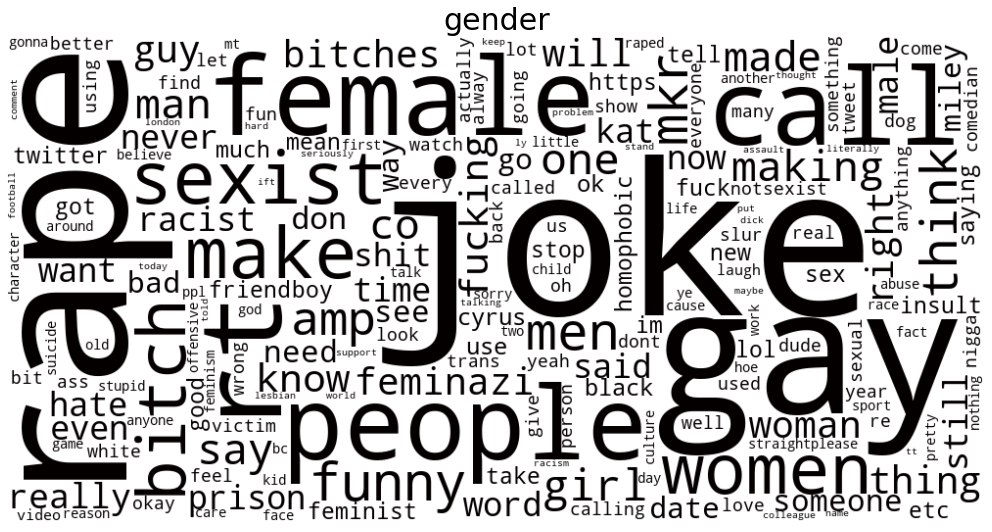

In [ ]:
word_cloud(data,'gender')

In [ ]:
#Bigrams - can be a good feature in model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def top_n_gram(corpus,ngram_range,n=None):
    vector = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    words = vector.transform(corpus)
    freq_words = words.sum(axis=0) 
    words_freq = [(word, freq_words[0, idx]) for word, idx in vector.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

Tweet
make joke     241
rape gay      242
http co       292
make rape     407
can not       427
gay rape      465
joke rape     471
joke gay      475
gay joke      795
rape joke    2279
Name: count, dtype: int64
Tweet
rape joke    2279
gay joke      795
joke gay      475
joke rape     471
gay rape      465
can not       427
make rape     407
http co       292
rape gay      242
make joke     241
Name: count, dtype: int64


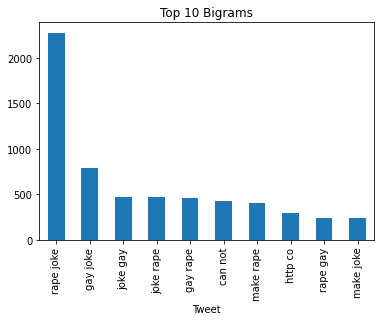

In [ ]:
text_gender = data[data['cyberbullying_type']=='gender'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_gender,(2,2),10)

gender2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
#gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True).plot(kind='bar',title = 'Top 10 Bigrams')
plot_gender = gender2.groupby('Tweet').sum()['count'].sort_values(ascending=True)
print(plot_gender)

plot_gender_re= plot_gender.iloc[::-1]
print(plot_gender_re)
plot_gender_re.plot(kind='bar',title = 'Top 10 Bigrams')

plt.show()


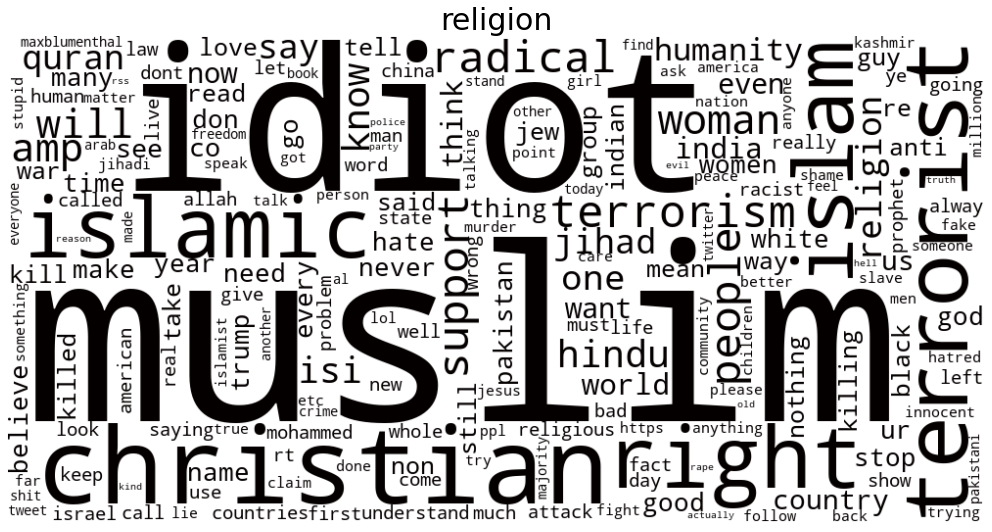

In [ ]:
#EDA for the religion
word_cloud(data,'religion')

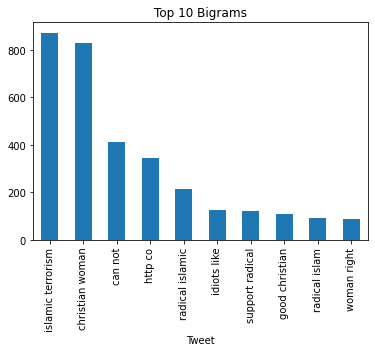

In [ ]:
text_religion = data[data['cyberbullying_type']=='religion'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_religion,(2,2),10)

religion2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
religion2.groupby('Tweet').sum()['count'].sort_values(ascending=True).iloc[::-1].plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

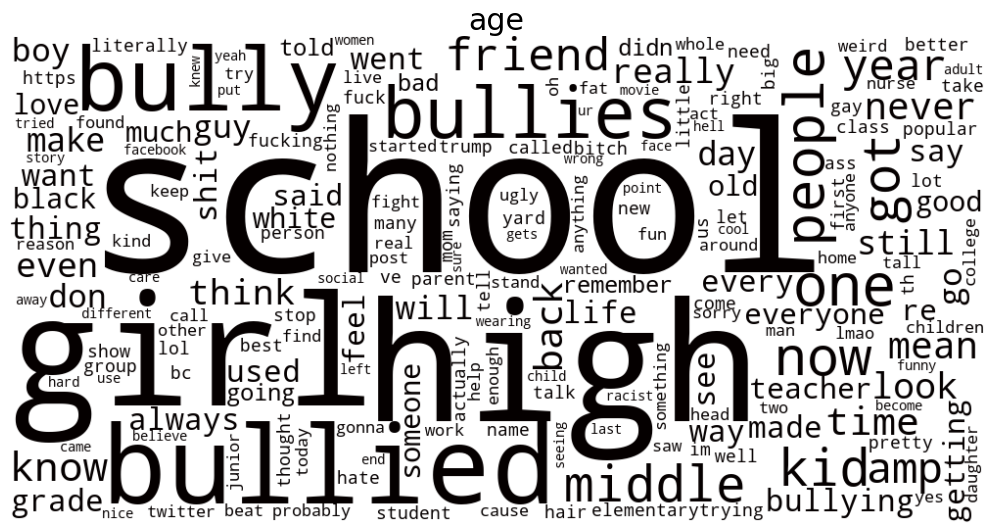

In [ ]:
#EDA for the age
word_cloud(data,'age')

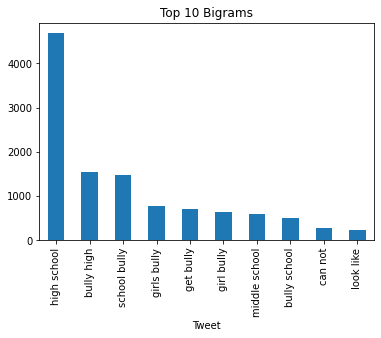

In [ ]:
text_age = data[data['cyberbullying_type']=='age'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_age,(2,2),10)

age2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
age2.groupby('Tweet').sum()['count'].sort_values(ascending=True).iloc[::-1].plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

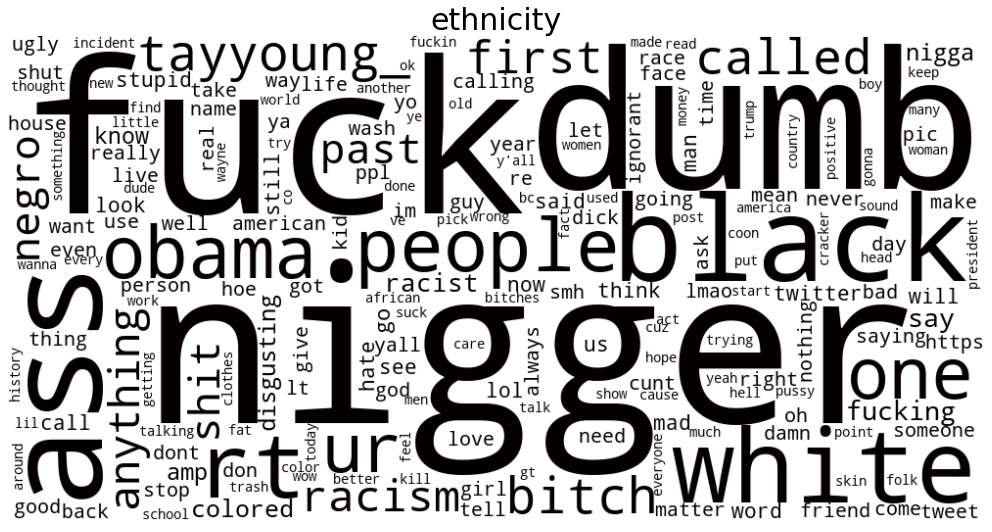

In [ ]:
#EDA for 'ethnicity'
word_cloud(data,'ethnicity')

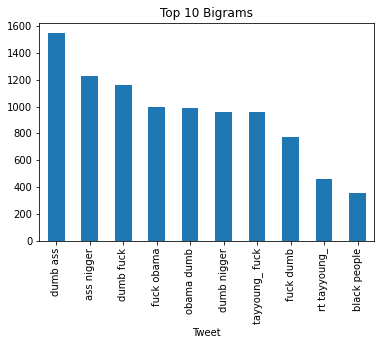

In [ ]:
text_ethnicity = data[data['cyberbullying_type']=='ethnicity'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_ethnicity,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).iloc[::-1].plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

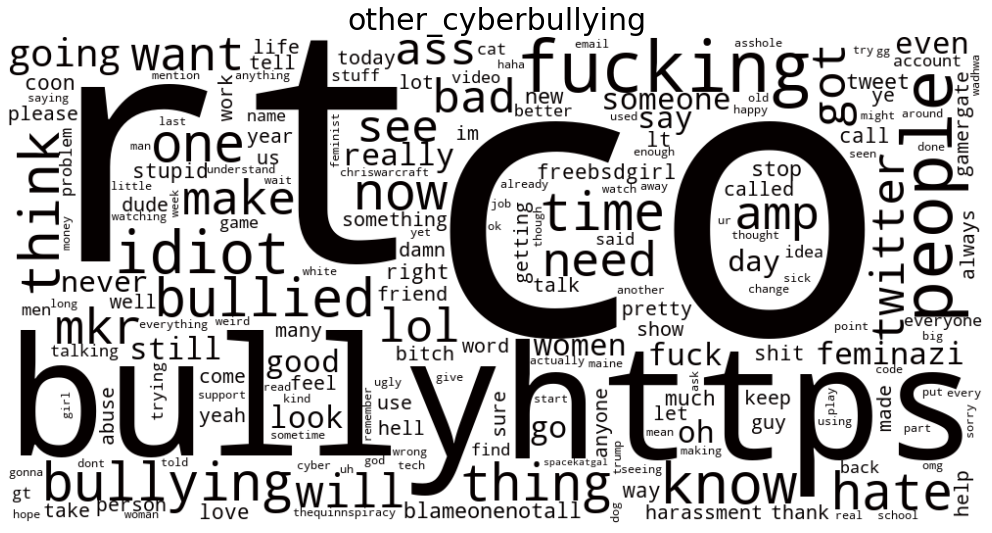

In [ ]:
#EDA for 'other_cyberbullying'
word_cloud(data,'other_cyberbullying')

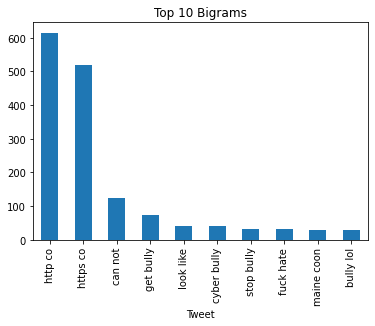

In [ ]:
text_other_cyber = data[data['cyberbullying_type']=='other_cyberbullying'].tweet_clean_stopword_removed.values
bigrams = top_n_gram(text_other_cyber,(2,2),10)

ethnicity2 = pd.DataFrame(bigrams, columns = ['Tweet' , 'count'])
ethnicity2.groupby('Tweet').sum()['count'].sort_values(ascending=True).iloc[::-1].plot(kind='bar',title = 'Top 10 Bigrams')
plt.show()

#Feature Extraction and Modelling
Different techniques used here like Bag of words and Word2vec. 

In [ ]:
#Label Encoding the target variable

from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
data['target'] = labelencoder.fit_transform(data['cyberbullying_type'])

## Bag-of-Words

### 1. CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer = CountVectorizer(lowercase=True)
count_vectorizer.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X = scipy.sparse.hstack((X,np.array(data["char_count"],data["word_count"])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X = scipy.sparse.hstack((X,np.array(data['stopwords_vs_words'])[:,None]))


In [ ]:
y = data.cyberbullying_type.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train.shape} and their label's shape {y_train.shape}")
print(f"X test data has shape {X_test.shape} and their label's shape {y_test.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


#### Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=555)

In [ ]:
# with original text with count_vectorizer
#from sklearn.metrics import f1_score
#y_pred = rf.predict(X_test)
#print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.844741


In [ ]:
# with clean text with count_vectorizer - Removed stopwords and stemming and lemmatisation too

y_pred = rf.predict(X_test)
print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.853759


In [ ]:
#Clean Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.97      0.98      0.97      1645
other_cyberbullying       0.99      0.98      0.99      1562
           religion       0.90      0.84      0.87      1518
          ethnicity       0.64      0.69      0.66      1583
  not_cyberbullying       0.64      0.63      0.63      1273
             gender       0.96      0.96      0.96      1623

           accuracy                           0.85      9204
          macro avg       0.85      0.85      0.85      9204
       weighted avg       0.86      0.85      0.85      9204



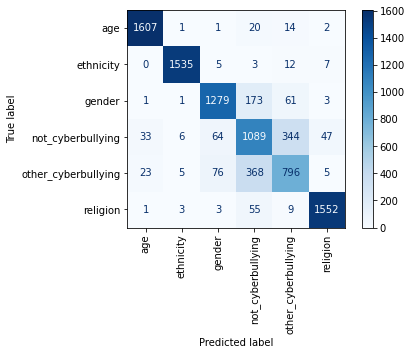

In [ ]:
#Clean Text
plot_confusion_matrix(estimator=rf, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vectorizer_clean = CountVectorizer(lowercase=True)
count_vectorizer_clean.fit(data.tweet_clean_stopword_removed_Stemmed)

CountVectorizer()

In [ ]:
X_clean_CV = count_vectorizer_clean.transform(data.tweet_clean_stopword_removed_Stemmed)
y_clean_CV = data.cyberbullying_type.values
X_clean_train_CV, X_clean_test_CV, y_clean_train_CV, y_clean_test_CV = train_test_split(X_clean_CV, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV.shape} and their label's shape {y_clean_train_CV.shape}")
print(f"X test data has shape {X_clean_test_CV.shape} and their label's shape {y_clean_test_CV.shape}")

X train data has shape (36813, 49606) and their label's shape (36813,)
X test data has shape (9204, 49606) and their label's shape (9204,)


In [ ]:
import scipy.sparse
from scipy.sparse import csr_matrix

In [ ]:
X_clean_CV_fearure = count_vectorizer_clean.transform(data.tweet_text_clean)
#X = count_vectorizer.transform(data.tweet_clean_stopword_removed_Stemmed)

import scipy.sparse
from scipy.sparse import csr_matrix

X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV,np.array(data["char_count"],data["word_count"])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['capital_char_count'],data['capital_word_count'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['count_words_in_quotes'],data['Number_of_sentences'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['Unique_words'],data['Hashtags'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['number_of_mentions'],data['Number_of_stopwords'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['avg_sentlength'],data['unique_vs_words'])[:,None]))
X_clean_CV_fearure = scipy.sparse.hstack((X_clean_CV_fearure,np.array(data['stopwords_vs_words'])[:,None]))

In [ ]:
X_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_train_CV_feature, y_clean_test_CV_feature = train_test_split(X_clean_CV_fearure, y_clean_CV, test_size=.2, random_state=555)

print(f"X train data has shape {X_clean_train_CV_feature.shape} and their label's shape {y_clean_train_CV_feature.shape}")
print(f"X test data has shape {X_clean_test_CV_feature.shape} and their label's shape {y_clean_test_CV_feature.shape}")

X train data has shape (36813, 49613) and their label's shape (36813,)
X test data has shape (9204, 49613) and their label's shape (9204,)


In [ ]:
import pickle
def train_CV(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test, average = 'micro')
  print(model_n)
  print('F1_score ((Using CountVectonizer of words technique)) : %f' %(f1))
  print('Accuracy_score of ((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))

#### Decision Trees

DecisionTree
F1_score ((Using CountVectonizer of words technique)) : 0.829857
Accuracy_score of ((Using Bag of words technique)) : 0.829857

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.98      0.97      0.98      1645
             gender       0.98      0.98      0.98      1562
           religion       0.88      0.83      0.86      1518
other_cyberbullying       0.59      0.62      0.60      1583
          ethnicity       0.57      0.60      0.58      1273
                age       0.94      0.93      0.94      1623

           accuracy                           0.83      9204
          macro avg       0.82      0.82      0.82      9204
       weighted avg       0.83      0.83      0.83      9204



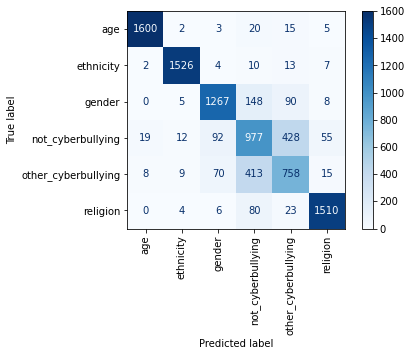

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CV("DecisionTree", dt, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Gradient Boosting


GradientBoosting_CV
F1_score ((Using CountVectonizer of words technique)) : 0.851152
Accuracy_score of ((Using Bag of words technique)) : 0.851152

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.98      0.97      0.98      1645
             gender       0.99      0.98      0.99      1562
           religion       0.92      0.83      0.87      1518
other_cyberbullying       0.61      0.72      0.66      1583
          ethnicity       0.63      0.60      0.62      1273
                age       0.97      0.94      0.96      1623

           accuracy                           0.85      9204
          macro avg       0.85      0.84      0.85      9204
       weighted avg       0.86      0.85      0.85      9204



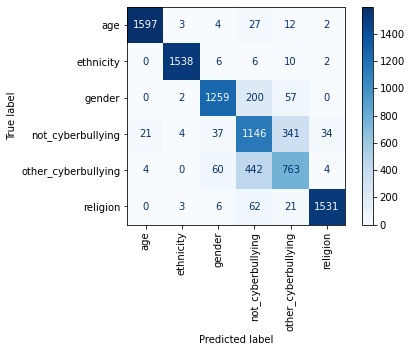

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)


train_CV("GradientBoosting_CV", gb, X_clean_train_CV_feature, y_clean_train_CV_feature, X_clean_test_CV_feature, y_clean_test_CV_feature)

#### Light GBM

In [ ]:
X_clean_train_CV_LGBM =X_clean_train_CV_feature.astype('float32')
#y_train_CV_LGBM = y_train_CV.astype('float32')
X_clean_test_CV_LGBM = X_clean_test_CV_feature.astype('float32')
#y_test_CV_LGBM = y_test_CV.astype('float32')

LightGBM
F1_score ((Using CountVectonizer of words technique)) : 0.862886
Accuracy_score of ((Using Bag of words technique)) : 0.862886

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.99      0.97      0.98      1645
             gender       0.99      0.99      0.99      1562
           religion       0.91      0.85      0.88      1518
other_cyberbullying       0.65      0.70      0.67      1583
          ethnicity       0.65      0.67      0.66      1273
                age       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.86      0.86      9204
       weighted avg       0.87      0.86      0.87      9204



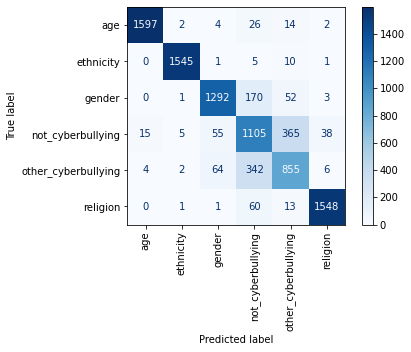

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CV("LightGBM", lgb, X_clean_train_CV_LGBM, y_clean_train_CV, X_clean_test_CV_LGBM, y_clean_test_CV)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
#Original  Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.837027
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.837027


In [ ]:
#Original Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
other_cyberbullying       1.00      0.98      0.99      1562
           religion       0.94      0.78      0.85      1518
          ethnicity       0.56      0.77      0.65      1583
  not_cyberbullying       0.63      0.53      0.57      1273
             gender       0.98      0.93      0.95      1623

           accuracy                           0.84      9204
          macro avg       0.85      0.83      0.83      9204
       weighted avg       0.86      0.84      0.84      9204



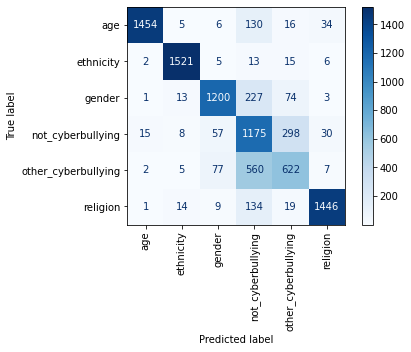

In [ ]:
#Original Text
plot_confusion_matrix(estimator=rf, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Try using the feature scaling
# Feature Scaling
# Tried this feature scaling but no improvmenet in the accuracy so leaving out this step.
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler(with_mean=False)
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

[11:15:26] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score of XGBoost((Using Bag of words technique)) : 0.861691


In [ ]:
#Clean Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

          ethnicity       0.99      0.97      0.98      1645
other_cyberbullying       0.99      0.98      0.99      1562
                age       0.93      0.79      0.85      1518
             gender       0.56      0.75      0.64      1583
           religion       0.60      0.51      0.56      1273
  not_cyberbullying       0.98      0.93      0.95      1623

           accuracy                           0.83      9204
          macro avg       0.84      0.82      0.83      9204
       weighted avg       0.85      0.83      0.84      9204



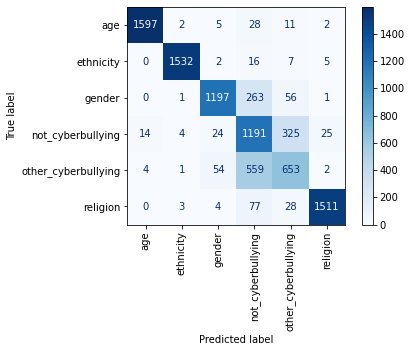

In [ ]:
#Clean Text
plot_confusion_matrix(estimator=xgboost_model , X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

#### Adaboost

In [ ]:
#Clean text
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train, y_train)

#Predict
y_pred = adaboost_model.predict(X_test)

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of AdaBoost((Using Bag of words technique)) : 0.787810
Accuracy_score of AdaBoost((Using Bag of words technique)) : 0.787810


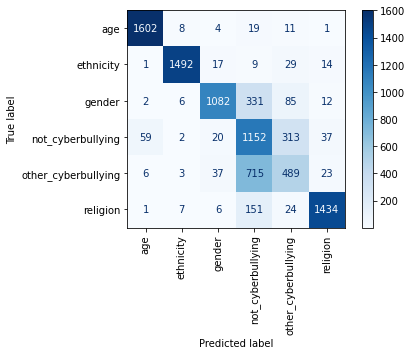

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Clean Text
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.96      0.97      0.97      1645
           religion       0.98      0.96      0.97      1562
  not_cyberbullying       0.93      0.71      0.81      1518
          ethnicity       0.48      0.73      0.58      1583
             gender       0.51      0.38      0.44      1273
                age       0.94      0.88      0.91      1623

           accuracy                           0.79      9204
          macro avg       0.80      0.77      0.78      9204
       weighted avg       0.81      0.79      0.79      9204



#### CatBoost

In [ ]:
#Catboost


model = CatBoostClassifier()
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

In [ ]:
#Clean Text

print('F1_score of CatBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))
print('Accuracy_score of CatBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of CatBoost((Using Bag of words technique)) : 0.860278
Accuracy_score of CatBoost((Using Bag of words technique)) : 0.860278


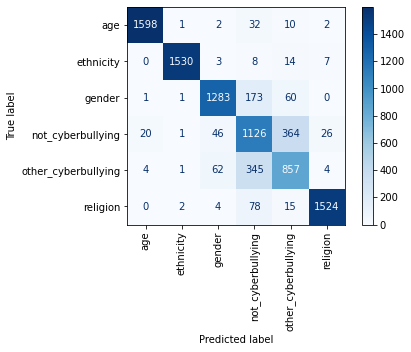

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
           religion       1.00      0.98      0.99      1562
  not_cyberbullying       0.92      0.85      0.88      1518
          ethnicity       0.64      0.71      0.67      1583
             gender       0.65      0.67      0.66      1273
                age       0.98      0.94      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.85      0.86      9204
       weighted avg       0.87      0.86      0.86      9204



### 2. TF-IDF

In [ ]:
import sklearn.feature_extraction.text

In [ ]:
tfidf = sklearn.feature_extraction.text.TfidfVectorizer(tokenizer=word_tokenize, min_df=.0005, max_df=.8)

In [ ]:
# with clean text
X_tfidf = tfidf.fit_transform(data.tweet_clean_stopword_removed_Stemmed).toarray()
y_tfidf = data.cyberbullying_type.values

# # with cleaned text
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.cyberbullying_type.values

# # with cleaned text & label-encoded target
# X = tfidf.fit_transform(data.tweet_text_clean).toarray()
# y = data.target.values

In [ ]:
X_tfidf = pd.DataFrame(X_tfidf)

In [ ]:
#Adding New Features
X_tfidf['char_count']= data[["char_count"]]
X_tfidf['word_count']= data[["word_count"]]
X_tfidf['capital_char_count']= data[["capital_char_count"]]
X_tfidf['capital_word_count']= data[["capital_word_count"]]
X_tfidf['count_words_in_quotes']= data[["count_words_in_quotes"]]
X_tfidf['Number_of_sentences']= data[["Number_of_sentences"]]
X_tfidf['Unique_words']= data[["Unique_words"]]
X_tfidf['Hashtags']= data[["Hashtags"]]
X_tfidf['number_of_mentions']= data[["number_of_mentions"]]
X_tfidf['Number_of_stopwords']= data[["Number_of_stopwords"]]
X_tfidf['unique_vs_words']= data[["unique_vs_words"]]
X_tfidf['stopwords_vs_words']= data[["stopwords_vs_words"]]


In [ ]:
X_tfidf = X_tfidf.fillna(0)

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_tfidf, y_tfidf, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_2.shape} and their label's shape {y_train_2.shape}")
print(f"X test data has shape {X_test_2.shape} and their label's shape {y_test_2.shape}")

X train data has shape (36813, 2610) and their label's shape (36813,)
X test data has shape (9204, 2610) and their label's shape (9204,)


####Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_2, y_train_2)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_2)
print('F1_score : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score : 0.869187


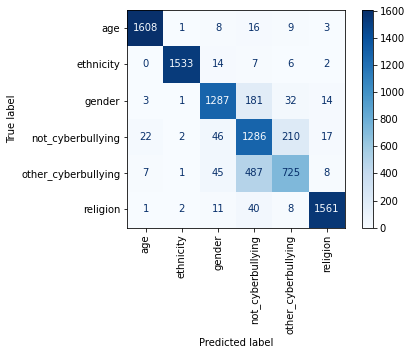

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.98      0.98      1645
  not_cyberbullying       1.00      0.98      0.99      1562
                age       0.91      0.85      0.88      1518
           religion       0.64      0.81      0.71      1583
          ethnicity       0.73      0.57      0.64      1273
             gender       0.97      0.96      0.97      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.86      0.86      9204
       weighted avg       0.88      0.87      0.87      9204



In [ ]:
#with cleaned text > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score : 0.825558


In [ ]:
#with cleaned text & labeled target > TF-IDF
# from sklearn.metrics import f1_score
# y_pred = rf.predict(X_test)
# print('F1_score : %f' %(f1_score(y_pred, y_test, average = 'micro')))


F1_score : 0.825558


In [ ]:
def train_TF(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using TF-IDF technique)) : %f' %(f1))
  print('Accuracy_score of ((Using TF-IDF technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_TF
F1_score ((Using TF-IDF technique)) : 0.836701
Accuracy_score of ((Using TF-IDF technique)) : 0.836701

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.96      0.97      1645
                age       0.98      0.97      0.97      1562
           religion       0.86      0.82      0.84      1518
             gender       0.63      0.67      0.65      1583
  not_cyberbullying       0.61      0.62      0.61      1273
          ethnicity       0.94      0.93      0.94      1623

           accuracy                           0.84      9204
          macro avg       0.83      0.83      0.83      9204
       weighted avg       0.84      0.84      0.84      9204



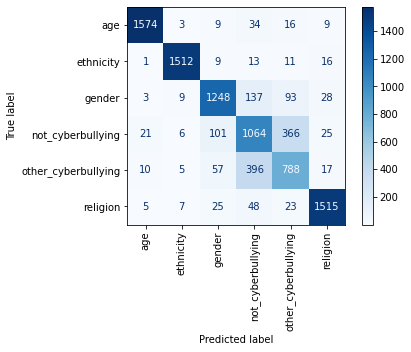

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_TF("DecisionTree_TF", dt, X_train_2, y_train_2, X_test_2, y_test_2)

####GradientBoosting

GradientBoosting_TF
F1_score ((Using TF-IDF technique)) : 0.866037
Accuracy_score of ((Using TF-IDF technique)) : 0.866037

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.99      0.97      0.98      1645
                age       0.99      0.98      0.99      1562
           religion       0.93      0.84      0.88      1518
             gender       0.62      0.84      0.71      1583
  not_cyberbullying       0.74      0.53      0.62      1273
          ethnicity       0.96      0.96      0.96      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.85      0.86      9204
       weighted avg       0.88      0.87      0.87      9204



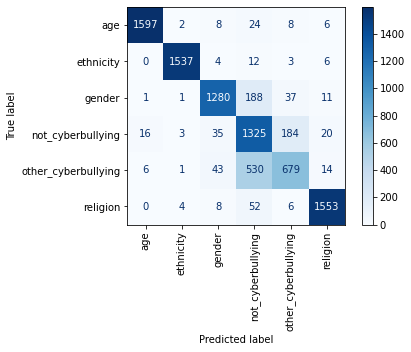

In [ ]:
gb = GradientBoostingClassifier(random_state=42)


train_TF("GradientBoosting_TF", gb, X_train_2, y_train_2, X_test_2, y_test_2)

####LightGBM

In [ ]:
X_clean_train_TF_LGBM =X_train_2.astype('float32')
X_clean_test_TF_LGBM = X_test_2.astype('float32')


LightGBM
F1_score ((Using TF-IDF technique)) : 0.879074
Accuracy_score of ((Using TF-IDF technique)) : 0.879074

------------------------------------------
                     precision    recall  f1-score   support

  not_cyberbullying       0.99      0.97      0.98      1645
             gender       1.00      0.99      0.99      1562
           religion       0.92      0.87      0.90      1518
other_cyberbullying       0.67      0.78      0.72      1583
          ethnicity       0.71      0.64      0.67      1273
                age       0.97      0.97      0.97      1623

           accuracy                           0.88      9204
          macro avg       0.88      0.87      0.87      9204
       weighted avg       0.88      0.88      0.88      9204



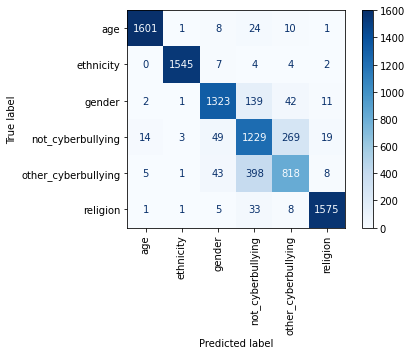

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_TF("LightGBM", lgb, X_clean_train_TF_LGBM, y_train_2, X_clean_test_TF_LGBM, y_test_2)

#### XGBoost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')

xgboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = xgboost_model.predict(X_test_2)

In [ ]:
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

F1_score of XGBoost((Using TF-IDF)) : 0.857997


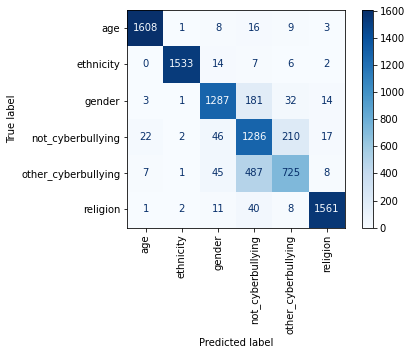

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
  not_cyberbullying       1.00      0.98      0.99      1562
                age       0.92      0.83      0.87      1518
           religion       0.60      0.88      0.71      1583
          ethnicity       0.76      0.46      0.57      1273
             gender       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.87      0.84      0.85      9204
       weighted avg       0.88      0.86      0.86      9204



#### Adaboost

In [ ]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = adaboost_model.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of AdaBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of AdaBoost((Using TF-IDF)) : 0.813451
Accuracy_score of AdaBoost((Using TF-IDF)) : 0.813451


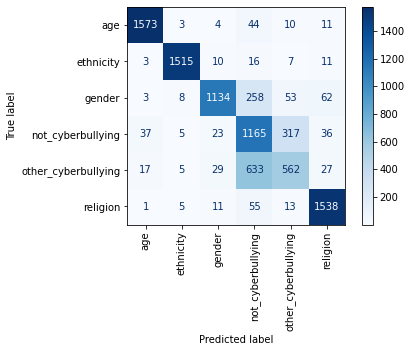

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.96      0.96      0.96      1645
  not_cyberbullying       0.98      0.97      0.98      1562
                age       0.94      0.75      0.83      1518
           religion       0.54      0.74      0.62      1583
          ethnicity       0.58      0.44      0.50      1273
             gender       0.91      0.95      0.93      1623

           accuracy                           0.81      9204
          macro avg       0.82      0.80      0.80      9204
       weighted avg       0.83      0.81      0.81      9204



####Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = catboost_model.predict(X_test_2)

Learning rate set to 0.095102
0:	learn: 1.5682851	total: 6.97s	remaining: 1h 56m 8s
1:	learn: 1.4280369	total: 10.3s	remaining: 1h 25m 16s
2:	learn: 1.3214212	total: 13.5s	remaining: 1h 14m 49s
3:	learn: 1.2344379	total: 16s	remaining: 1h 6m 28s
4:	learn: 1.1639418	total: 18.3s	remaining: 1h 36s
5:	learn: 1.1049044	total: 20.9s	remaining: 57m 50s
6:	learn: 1.0513018	total: 23.3s	remaining: 55m 3s
7:	learn: 1.0076703	total: 25.8s	remaining: 53m 24s
8:	learn: 0.9705675	total: 28.1s	remaining: 51m 35s
9:	learn: 0.9331106	total: 30.3s	remaining: 49m 57s
10:	learn: 0.8984218	total: 33s	remaining: 49m 29s
11:	learn: 0.8686209	total: 35.7s	remaining: 48m 58s
12:	learn: 0.8401687	total: 38s	remaining: 48m 6s
13:	learn: 0.8168370	total: 40.5s	remaining: 47m 32s
14:	learn: 0.7941767	total: 42.7s	remaining: 46m 45s
15:	learn: 0.7759705	total: 44.6s	remaining: 45m 44s
16:	learn: 0.7570993	total: 45.9s	remaining: 44m 14s
17:	learn: 0.7397838	total: 47.2s	remaining: 42m 54s
18:	learn: 0.7252558	tota

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using TF-IDF)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of CatBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred)))

F1_score of CatBoost((Using TF-IDF)) : 0.872555
Accuracy_score of CatBoost((Using TF-IDF)) : 0.872555


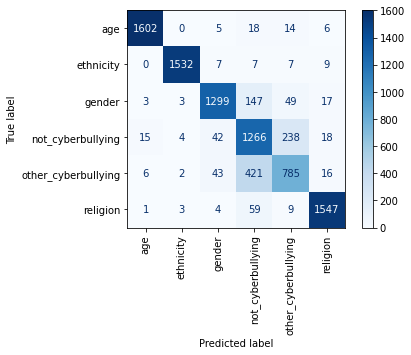

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_2, y_true=y_test_2, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_2, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.98      0.97      0.98      1645
  not_cyberbullying       0.99      0.98      0.99      1562
                age       0.93      0.86      0.89      1518
           religion       0.66      0.80      0.72      1583
          ethnicity       0.71      0.62      0.66      1273
             gender       0.96      0.95      0.96      1623

           accuracy                           0.87      9204
          macro avg       0.87      0.86      0.87      9204
       weighted avg       0.88      0.87      0.87      9204



## Word2Vec

In [ ]:
pip install gensim==4.0.0

     |████████████████████████████████| 23.9 MB 1.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# https://www.kaggle.com/ananyabioinfo/text-classification-using-word2vec

###CBOW

In [ ]:
from gensim.models import TfidfModel
import gensim

In [ ]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

In [ ]:
# downloading stopwords list
nltk_download('stopwords')
stop = stopwords.words('english')

#ADJUSTING DATA FORMAT

#Putting all tweets in a lower case format
data['tweet_token'] = data['tweet_text'].str.lower()

#Removing numbers and punctuations
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[!$(),\n“%^*?:;.&~"`0-9]', '', x))
data['tweet_token'] = data['tweet_token'].apply(lambda x: re.sub(r'[[]]', '', x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
tweet_token = []
for i, sent in enumerate(data.tweet_token):
    token = tweet_tokenizer.tokenize(sent)
    token = [word for word in token if word not in stop]
    data["tweet_token"].iloc[i] = token
    tweet_token.append(token)

In [ ]:
data

tweet_text  \
0                                                                                                                                                In other words #katandandre, your food was crapilicious! #mkr   
1                                                                                          Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc   
2                                                                                                                                                 @XochitlSuckkks a classy whore? Or more red velvet cupcakes?   
3                                                                                                      @Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter.   
4                                                                                                      @RudhoeEnglish This is an ISIS account pretending to be a Kurdish account.  Like Islam, it is all lies.   
...                                                                                                                                                                                                        ...   
47687  Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will ...   
47688  Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must ...   
47689                                                                                                 I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.   
47690                                                                                                               Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.   
47691                                                                                                                             Bro. U gotta chill RT @CHILLShrammy: Dog FUCK KP that dumb nigger bitch lmao   

      cyberbullying_type  char_count  word_count  capital_char_count  \
0      not_cyberbullying          61           9                   1   
1      not_cyberbullying         115          14                  12   
2      not_cyberbullying          60           9                   3   
3      not_cyberbullying         103          18                   3   
4      not_cyberbullying         103          18                  10   
...                  ...         ...         ...                 ...   
47687          ethnicity         234          42                   3   
47688          ethnicity         276          45                   4   
47689          ethnicity         104          20                   9   
47690          ethnicity          90          15                  52   
47691          ethnicity          76          14                  17   

       capital_word_count  punctuation_count  count_words_in_quotes  \
0                       0                  3                      0   
1                       1                  2                      0   
2                       0                  2                      0   
3                       1                  5                      0   
4                       1                  3                      0   
...                   ...                ...                    ...   
47687                   0                  3                      0   
47688                   0                  3                      0   
47689                   3                  5                      0   
47690                  11                  4                      0   
47691                   4    

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_cbow = Word2Vec(sentences = data['tweet_token'], vector_size = 100, min_count = 0, window = 5, workers = 2, sg = 0)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 100
X_pad = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_cbow.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad
y = data.cyberbullying_type.values

#### Random Forest

In [ ]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_3.shape} and their label's shape {y_train_3.shape}")
print(f"X test data has shape {X_test_3.shape} and their label's shape {y_test_3.shape}")

X train data has shape (36813, 100) and their label's shape (36813,)
X test data has shape (9204, 100) and their label's shape (9204,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_3, y_train_3)

RandomForestClassifier(random_state=555)

In [ ]:
from sklearn.metrics import f1_score
y_pred = rf.predict(X_test_3)
print('F1_score : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score : 0.686441


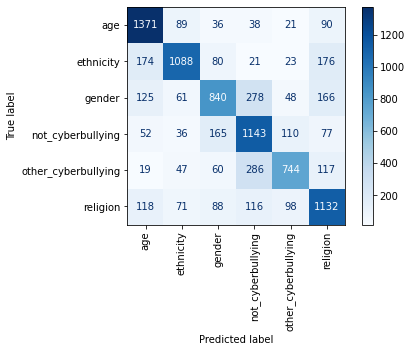

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.80      0.77      0.79      1645
  not_cyberbullying       0.86      0.72      0.78      1562
                age       0.72      0.55      0.63      1518
           religion       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
             gender       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.70      9204
       weighted avg       0.73      0.70      0.70      9204



In [ ]:
import pickle
def train_CBOW(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using CBOW technique)) : %f' %(f1))
  print('Accuracy_score of ((Using CBOW technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_CBOW
F1_score ((Using CBOW technique)) : 0.591808
Accuracy_score of ((Using CBOW technique)) : 0.591808

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.72      0.70      0.71      1645
                age       0.66      0.69      0.67      1562
           religion       0.52      0.54      0.53      1518
             gender       0.53      0.50      0.52      1583
  not_cyberbullying       0.57      0.57      0.57      1273
          ethnicity       0.54      0.54      0.54      1623

           accuracy                           0.59      9204
          macro avg       0.59      0.59      0.59      9204
       weighted avg       0.59      0.59      0.59      9204



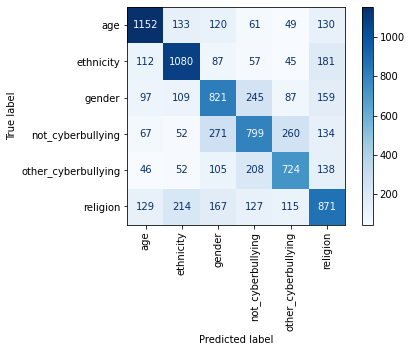

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_CBOW("DecisionTree_CBOW", dt, X_train_3, y_train_3, X_test_3, y_test_3)

####GradientBoosting

GradientBoosting_CBOW
F1_score ((Using CBOW technique)) : 0.735984
Accuracy_score of ((Using CBOW technique)) : 0.735984

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.85      0.83      0.84      1645
                age       0.87      0.78      0.82      1562
           religion       0.73      0.61      0.66      1518
             gender       0.57      0.82      0.67      1583
  not_cyberbullying       0.82      0.56      0.67      1273
          ethnicity       0.70      0.78      0.74      1623

           accuracy                           0.74      9204
          macro avg       0.76      0.73      0.73      9204
       weighted avg       0.76      0.74      0.74      9204



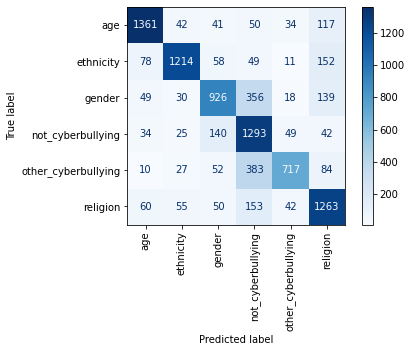

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

train_CBOW("GradientBoosting_CBOW", gb, X_train_3, y_train_3, X_test_3, y_test_3)

####LightGBM

In [ ]:
X_clean_train_CBOW_LGBM =X_train_3.astype('float32')
X_clean_test_CBOW_LGBM = X_test_3.astype('float32')

LightGBM_CBOW
F1_score ((Using CBOW technique)) : 0.802260
Accuracy_score of ((Using CBOW technique)) : 0.802260

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.91      0.93      0.92      1645
                age       0.93      0.86      0.89      1562
           religion       0.83      0.69      0.75      1518
             gender       0.62      0.81      0.71      1583
  not_cyberbullying       0.77      0.65      0.71      1273
          ethnicity       0.80      0.84      0.82      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.80      0.80      9204



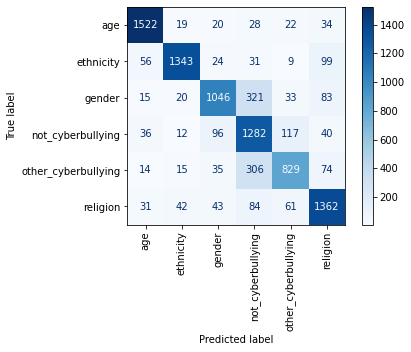

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_CBOW("LightGBM_CBOW", lgb, X_clean_train_CBOW_LGBM, y_train_3, X_clean_test_CBOW_LGBM, y_test_3)

#### XGboost

In [ ]:
model = XGBClassifier(objective = 'multi:softmax')
xgboost_model = model.fit(X_train_3, y_train_3)
y_pred = xgboost_model.predict(X_test_3)

In [ ]:
print('F1_score of XGBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))

F1_score of XGBoost((Using CBOW)) : 0.697957


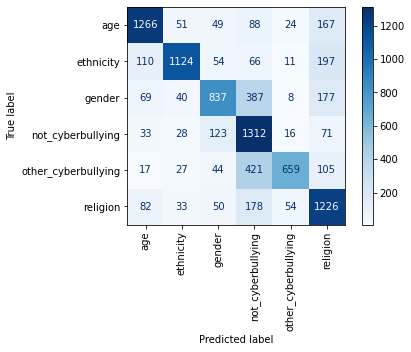

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.80      0.77      0.79      1645
             gender       0.86      0.72      0.78      1562
           religion       0.72      0.55      0.63      1518
  not_cyberbullying       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
other_cyberbullying       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.70      9204
       weighted avg       0.73      0.70      0.70      9204



#### Adaboost

In [ ]:
model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = adaboost_model.predict(X_test_3)

In [ ]:
print('F1_score of AdaBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of AdaBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using CBOW)) : 0.464255
Accuracy_score of AdaBoost((Using CBOW)) : 0.464255


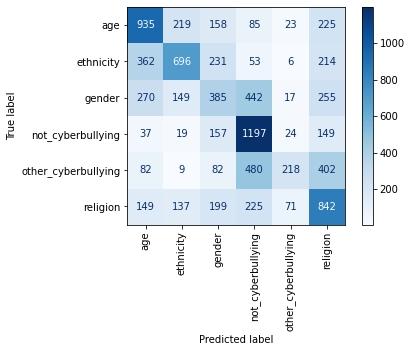

In [ ]:
#Clean_Text

plot_confusion_matrix(estimator=adaboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
#Clean Text
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.51      0.57      0.54      1645
  not_cyberbullying       0.57      0.45      0.50      1562
                age       0.32      0.25      0.28      1518
           religion       0.48      0.76      0.59      1583
          ethnicity       0.61      0.17      0.27      1273
             gender       0.40      0.52      0.45      1623

           accuracy                           0.46      9204
          macro avg       0.48      0.45      0.44      9204
       weighted avg       0.48      0.46      0.45      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_3, y_train_3)

#Predict
y_pred = catboost_model.predict(X_test_3)

Learning rate set to 0.095102
0:	learn: 1.7376843	total: 180ms	remaining: 2m 59s
1:	learn: 1.6951874	total: 338ms	remaining: 2m 48s
2:	learn: 1.6602609	total: 491ms	remaining: 2m 43s
3:	learn: 1.6294453	total: 644ms	remaining: 2m 40s
4:	learn: 1.5999252	total: 803ms	remaining: 2m 39s
5:	learn: 1.5743577	total: 955ms	remaining: 2m 38s
6:	learn: 1.5498881	total: 1.11s	remaining: 2m 37s
7:	learn: 1.5292993	total: 1.28s	remaining: 2m 39s
8:	learn: 1.5105275	total: 1.45s	remaining: 2m 39s
9:	learn: 1.4932779	total: 1.61s	remaining: 2m 39s
10:	learn: 1.4781687	total: 1.77s	remaining: 2m 39s
11:	learn: 1.4652683	total: 1.91s	remaining: 2m 37s
12:	learn: 1.4509725	total: 2.06s	remaining: 2m 36s
13:	learn: 1.4369026	total: 2.23s	remaining: 2m 37s
14:	learn: 1.4251068	total: 2.37s	remaining: 2m 35s
15:	learn: 1.4127717	total: 2.51s	remaining: 2m 34s
16:	learn: 1.3985700	total: 2.67s	remaining: 2m 34s
17:	learn: 1.3874691	total: 2.88s	remaining: 2m 37s
18:	learn: 1.3778883	total: 3.01s	remaining:

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using CBOW)) : %f' %(f1_score(y_pred, y_test_3, average = 'micro')))
print('Accuracy_score of CatBoost((Using CBOW)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of CatBoost((Using CBOW)) : 0.804650
Accuracy_score of CatBoost((Using CBOW)) : 0.804650


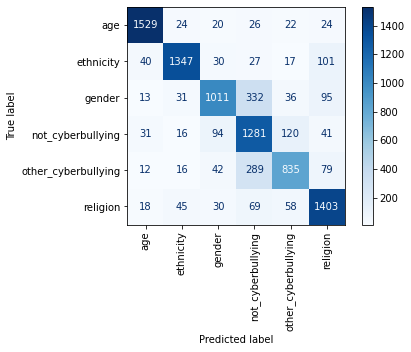

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_3, y_true=y_test_3, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_3, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

other_cyberbullying       0.93      0.93      0.93      1645
  not_cyberbullying       0.91      0.86      0.89      1562
                age       0.82      0.67      0.74      1518
           religion       0.63      0.81      0.71      1583
          ethnicity       0.77      0.66      0.71      1273
             gender       0.80      0.86      0.83      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.80      0.81      9204



### Skipgram

In [ ]:
from gensim.models import Word2Vec, Phrases

In [ ]:
from keras.preprocessing.sequence import pad_sequences

In [ ]:
model_SG = Word2Vec(sentences = data['tweet_token'], vector_size = 300, min_count = 0, window = 10, workers = 2, sg = 1)

In [ ]:
def vectorize_data(data, vocab: dict) -> list:
    print('Vectorize sentences...', end='\r')
    keys = list(vocab.keys())
    filter_unknown = lambda word: vocab.get(word, None) is not None
    encode = lambda review: list(map(keys.index, filter(filter_unknown, review)))
    vectorized = list(map(encode, data))
    print('Vectorize sentences... (done)')
    return vectorized

In [ ]:
X_data = tweet_token
input_length = 300
X_pad_SG = pad_sequences(
    sequences=vectorize_data(X_data, vocab=model_SG.wv.key_to_index),
    maxlen=input_length,
    padding='post')
print('Transform sentences to sequences... (done)')

Vectorize sentences... (done)
Transform sentences to sequences... (done)


In [ ]:
X = X_pad_SG
y = data.cyberbullying_type.values

In [ ]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=.2, random_state=555)

print(f"X train data has shape {X_train_4.shape} and their label's shape {y_train_4.shape}")
print(f"X test data has shape {X_test_4.shape} and their label's shape {y_test_4.shape}")

X train data has shape (36813, 300) and their label's shape (36813,)
X test data has shape (9204, 300) and their label's shape (9204,)


#### Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=555)
rf.fit(X_train_4, y_train_4)

RandomForestClassifier(random_state=555)

In [ ]:
y_pred = rf.predict(X_test_4)
print('F1_score : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score : 0.672534


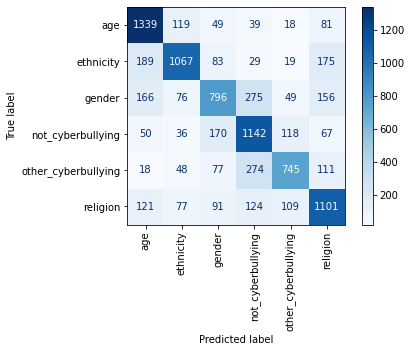

In [ ]:
plot_confusion_matrix(estimator=rf, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.93      0.93      0.93      1645
             gender       0.92      0.87      0.89      1562
           religion       0.82      0.68      0.74      1518
  not_cyberbullying       0.63      0.81      0.71      1583
          ethnicity       0.77      0.65      0.70      1273
other_cyberbullying       0.81      0.86      0.83      1623

           accuracy                           0.81      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.81      0.81      9204



In [ ]:
def train_SG(model_n, model, X_train, y_train, X_test, y_test):

  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  f1 = f1_score(y_pred, y_test,average = 'micro')
  print(model_n)
  print('F1_score ((Using SkipGram of words technique)) : %f' %(f1))
  print('Accuracy_score of SG((Using SkipGram technique)) : %f'  %(accuracy_score(y_test, y_pred)))

  print('\n------------------------------------------')
  print(classification_report(y_test, y_pred, target_names=list(set(data.cyberbullying_type.values))))
  plot_confusion_matrix(estimator=model, X= X_test, y_true=y_test, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

  pickle.dump(model,open("/content/drive/MyDrive/Colab Notebooks/20_Ensemble_Learning/Project/models/" + model_n +".pkl",'wb'))
 

####Decision Tree

DecisionTree_SG
F1_score ((Using SkipGram of words technique)) : 0.588548
Accuracy_score of SG((Using SkipGram technique)) : 0.588548

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.72      0.69      0.70      1645
                age       0.65      0.69      0.67      1562
           religion       0.51      0.54      0.52      1518
             gender       0.53      0.50      0.52      1583
  not_cyberbullying       0.56      0.57      0.57      1273
          ethnicity       0.54      0.54      0.54      1623

           accuracy                           0.59      9204
          macro avg       0.59      0.59      0.59      9204
       weighted avg       0.59      0.59      0.59      9204



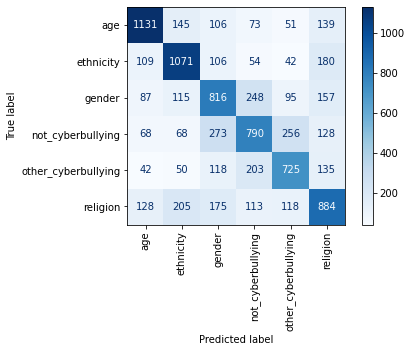

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

train_SG("DecisionTree_SG", dt, X_train_4, y_train_4, X_test_4, y_test_4)

####GradientBoosting

GradientBoosting_SG
F1_score ((Using SkipGram of words technique)) : 0.735876
Accuracy_score of SG((Using SkipGram technique)) : 0.735876

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.87      0.83      0.85      1645
                age       0.87      0.77      0.82      1562
           religion       0.73      0.62      0.67      1518
             gender       0.57      0.82      0.67      1583
  not_cyberbullying       0.82      0.57      0.67      1273
          ethnicity       0.70      0.77      0.73      1623

           accuracy                           0.74      9204
          macro avg       0.76      0.73      0.73      9204
       weighted avg       0.76      0.74      0.74      9204



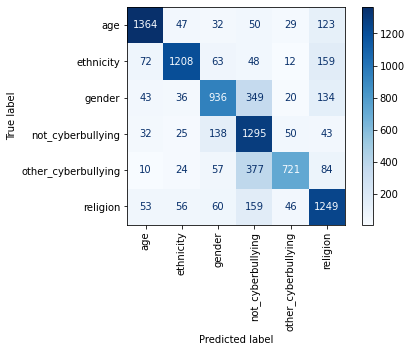

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)

train_SG("GradientBoosting_SG", gb, X_train_4, y_train_4, X_test_4, y_test_4)

####LightGBM

In [ ]:
X_clean_train_SG_LGBM =X_train_4.astype('float32')
X_clean_test_SG_LGBM = X_test_4.astype('float32')

LightGBM_SG
F1_score ((Using SkipGram of words technique)) : 0.800956
Accuracy_score of SG((Using SkipGram technique)) : 0.800956

------------------------------------------
                     precision    recall  f1-score   support

other_cyberbullying       0.90      0.92      0.91      1645
                age       0.92      0.86      0.89      1562
           religion       0.82      0.69      0.75      1518
             gender       0.63      0.80      0.70      1583
  not_cyberbullying       0.77      0.66      0.71      1273
          ethnicity       0.81      0.84      0.82      1623

           accuracy                           0.80      9204
          macro avg       0.81      0.79      0.80      9204
       weighted avg       0.81      0.80      0.80      9204



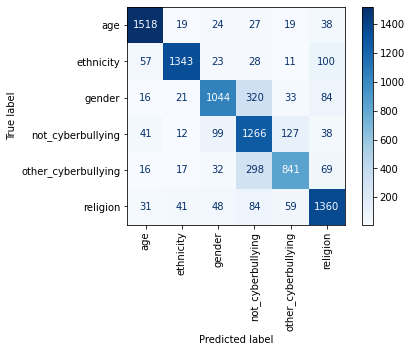

In [ ]:
#from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)

train_SG("LightGBM_SG", lgb, X_clean_train_SG_LGBM, y_train_4, X_clean_test_SG_LGBM, y_test_4)

#### Xgboost

In [ ]:
#Xgboost
model = XGBClassifier(objective = 'multi:softmax')

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = xgboost_model.predict(X_test_4)

In [ ]:
print('F1_score of XGBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))

F1_score of XGBoost((Using Skipgram)) : 0.695676


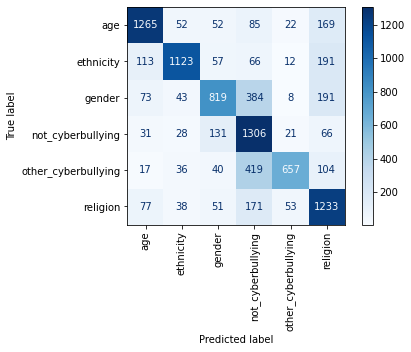

In [ ]:
plot_confusion_matrix(estimator=xgboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.80      0.77      0.79      1645
             gender       0.85      0.72      0.78      1562
           religion       0.71      0.54      0.61      1518
  not_cyberbullying       0.54      0.83      0.65      1583
          ethnicity       0.85      0.52      0.64      1273
other_cyberbullying       0.63      0.76      0.69      1623

           accuracy                           0.70      9204
          macro avg       0.73      0.69      0.69      9204
       weighted avg       0.73      0.70      0.70      9204



#### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(learning_rate=1)
adaboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = adaboost_model.predict(X_test_4)

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of AdaBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of AdaBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_3, y_pred)))

F1_score of AdaBoost((Using Skipgram)) : 0.460561
Accuracy_score of AdaBoost((Using Skipgram)) : 0.460561


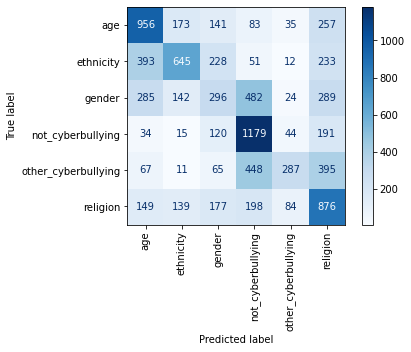

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=adaboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.51      0.58      0.54      1645
             gender       0.57      0.41      0.48      1562
           religion       0.29      0.19      0.23      1518
  not_cyberbullying       0.48      0.74      0.59      1583
          ethnicity       0.59      0.23      0.33      1273
other_cyberbullying       0.39      0.54      0.45      1623

           accuracy                           0.46      9204
          macro avg       0.47      0.45      0.44      9204
       weighted avg       0.47      0.46      0.44      9204



#### Catboost

In [ ]:
model = CatBoostClassifier()
catboost_model = model.fit(X_train_4, y_train_4)

#Predict
y_pred = catboost_model.predict(X_test_4)

Learning rate set to 0.095102
0:	learn: 1.7406798	total: 511ms	remaining: 8m 30s
1:	learn: 1.6975826	total: 841ms	remaining: 6m 59s
2:	learn: 1.6615778	total: 1.19s	remaining: 6m 34s
3:	learn: 1.6268917	total: 1.54s	remaining: 6m 23s
4:	learn: 1.6000505	total: 1.88s	remaining: 6m 14s
5:	learn: 1.5713456	total: 2.25s	remaining: 6m 11s
6:	learn: 1.5497263	total: 2.62s	remaining: 6m 11s
7:	learn: 1.5320588	total: 2.97s	remaining: 6m 8s
8:	learn: 1.5122297	total: 3.33s	remaining: 6m 6s
9:	learn: 1.4941323	total: 3.63s	remaining: 5m 59s
10:	learn: 1.4771683	total: 3.96s	remaining: 5m 55s
11:	learn: 1.4601598	total: 4.3s	remaining: 5m 54s
12:	learn: 1.4482489	total: 4.73s	remaining: 5m 59s
13:	learn: 1.4335514	total: 5.06s	remaining: 5m 56s
14:	learn: 1.4220926	total: 5.36s	remaining: 5m 52s
15:	learn: 1.4129224	total: 5.65s	remaining: 5m 47s
16:	learn: 1.4015530	total: 5.93s	remaining: 5m 43s
17:	learn: 1.3898422	total: 6.3s	remaining: 5m 43s
18:	learn: 1.3799258	total: 6.66s	remaining: 5m 

In [ ]:
#Clean Text
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of CatBoost((Using Skipgram)) : %f' %(f1_score(y_pred, y_test_4, average = 'micro')))
print('Accuracy_score of CatBoost((Using Skipgram)) : %f'  %(accuracy_score(y_test_4, y_pred)))

F1_score of CatBoost((Using Skipgram)) : 0.805737
Accuracy_score of CatBoost((Using Skipgram)) : 0.805737


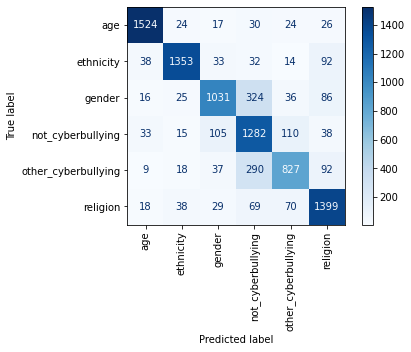

In [ ]:
#Clean_Text
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(estimator=catboost_model, X= X_test_4, y_true=y_test_4, xticks_rotation='vertical', cmap='Blues', ax=None, include_values=True)

In [ ]:
print(classification_report(y_test_4, y_pred, target_names=list(set(data.cyberbullying_type.values))))

                     precision    recall  f1-score   support

                age       0.93      0.93      0.93      1645
             gender       0.92      0.87      0.89      1562
           religion       0.82      0.68      0.74      1518
  not_cyberbullying       0.63      0.81      0.71      1583
          ethnicity       0.77      0.65      0.70      1273
other_cyberbullying       0.81      0.86      0.83      1623

           accuracy                           0.81      9204
          macro avg       0.81      0.80      0.80      9204
       weighted avg       0.81      0.81      0.81      9204




#Hyperparameter Tuning

## LightGBM

### Bag of words

In [ ]:
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': [34, 37], 
             'min_child_samples': [20, 25], 
             'min_child_weight': [1e-3, 1e-2],
             'reg_alpha': [0, 1e-1],
             'reg_lambda': [0, 1e-1]}


#              'feature_fraction': sp_uniform(loc=0.2, scale=0.8), 
#              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
#X_clean_train_CV_LGBM

In [ ]:

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#n_estimators is set to a "large value". The actual number of trees build will depend on early stopping and 5000 define only the absolute maximum
clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, n_estimators=100)
gs_CV = GridSearchCV(
    estimator=clf, param_grid=param_test, 
    scoring="f1_micro",
    cv = 3,
    refit=True,
    verbose=True)

In [ ]:
gs_CV.fit(X_clean_train_CV_LGBM, y_clean_train_CV)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'min_child_samples': [20, 25],
                         'min_child_weight': [0.001, 0.01],
                         'num_leaves': [34, 37], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0, 0.1]},
             scoring='f1_micro', verbose=True)

In [ ]:
print(gs_CV.best_params_)

grid_predictions_CV = gs_CV.predict(X_clean_test_CV_LGBM) 
   
# print classification report 
print(classification_report(y_clean_test_CV, grid_predictions_CV)) 

from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of LightGBM((Using TF-IDF)) : %f' %(f1_score(grid_predictions_CV, y_clean_test_CV, average = 'micro')))
print('Accuracy_score of LightGBM((Using TF-IDF)) : %f'  %(accuracy_score(y_clean_test_CV, grid_predictions_CV)))

{'min_child_samples': 20, 'min_child_weight': 0.001, 'num_leaves': 34, 'reg_alpha': 0, 'reg_lambda': 0}
                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
          ethnicity       0.99      0.99      0.99      1562
             gender       0.91      0.86      0.88      1518
  not_cyberbullying       0.66      0.70      0.68      1583
other_cyberbullying       0.65      0.68      0.67      1273
           religion       0.97      0.95      0.96      1623

           accuracy                           0.86      9204
          macro avg       0.86      0.86      0.86      9204
       weighted avg       0.87      0.86      0.87      9204

F1_score of LightGBM((Using TF-IDF)) : 0.864950
Accuracy_score of LightGBM((Using TF-IDF)) : 0.864950


### TF-IDF

In [ ]:

param_test ={'num_leaves': [34, 37], 
             'min_child_samples': [20, 25], 
             'min_child_weight': [1e-3, 1e-2],
             'reg_alpha': [0, 1e-1],
             'reg_lambda': [0, 1e-1]}


In [ ]:

import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


clf = lgb.LGBMClassifier(max_depth=-1, random_state=42, n_estimators=100)
gs = GridSearchCV(
    estimator=clf, param_grid=param_test, 
    scoring="f1_micro",
    cv = 3,
    refit=True,
    verbose=True)

In [ ]:
gs.fit(X_clean_train_TF_LGBM, y_train_2)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'min_child_samples': [20, 25],
                         'min_child_weight': [0.001, 0.01],
                         'num_leaves': [34, 37], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0, 0.1]},
             scoring='f1_micro', verbose=True)

In [ ]:
gs.best_params_

{'min_child_samples': 20,
 'min_child_weight': 0.001,
 'num_leaves': 34,
 'reg_alpha': 0.1,
 'reg_lambda': 0}

In [ ]:
grid_predictions = gs.predict(X_clean_test_TF_LGBM) 
   
# print classification report 
print(classification_report(y_test_2, grid_predictions)) 

                     precision    recall  f1-score   support

                age       0.99      0.97      0.98      1645
          ethnicity       0.99      0.99      0.99      1562
             gender       0.92      0.88      0.90      1518
  not_cyberbullying       0.68      0.77      0.72      1583
other_cyberbullying       0.71      0.65      0.68      1273
           religion       0.98      0.97      0.97      1623

           accuracy                           0.88      9204
          macro avg       0.88      0.87      0.87      9204
       weighted avg       0.88      0.88      0.88      9204



In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of LightGBM((Using TF-IDF)) : %f' %(f1_score(grid_predictions, y_test_2, average = 'micro')))
print('Accuracy_score of LightGBM((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, grid_predictions)))

F1_score of LightGBM((Using TF-IDF)) : 0.880052
Accuracy_score of LightGBM((Using TF-IDF)) : 0.880052


## Xgboost


### Bag of words 

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train, y_train), (X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16291015829751546
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE:
0.16427298458957962
SCORE:
0.16311982388090995
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.16427298458957962
SCORE:
0.1612328336303596
SCORE

In [ ]:
# define the model
model = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.5163471408413387, gamma =3.831493253976012, max_depth = 5, min_child_weight =6, reg_alpha= 123, reg_lambda= 0.5290142286731677)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model = model.fit(X_train, y_train)

#Predict
y_pred = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using Bag of words technique)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using Bag of words technique)) : %f'  %(accuracy_score(y_test, y_pred)))

F1_score of XGBoost((Using Bag of words technique)) : 0.798511
Accuracy_score of XGBoost((Using Bag of words technique)) : 0.798511


### TF-IDF

In [ ]:
def objective2(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [(X_train_2, y_train_2), (X_test_2, y_test_2)]
    
    clf.fit(X_train_2, y_train_2,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    pred= clf.predict(X_test_2)
    accuracy = accuracy_score(y_test_2,pred)

    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective2,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 20,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.25767900199182303
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.2626061432015935
SCORE:
0.23545445015200756
SCORE:
0.2578886675752175
SCORE:
0.2548485166159975
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
SCORE:
0.23545445015200756
100%|██████████| 20/20 [33:32<00:00, 100.62s/it, best loss: -0.2626061432015935]
The best hyperparameters are :  

{'colsample_bytree': 0.9308781563799851, 'gamma': 1.9365290511369784, 'max_depth': 5.0, 'min_child_weight': 7.0, 'reg_alpha': 43.0, 'reg_lambda': 0.9710120546082042}


In [ ]:
# define the model
model_2 = XGBClassifier(objective = 'multi:softmax',colsample_bytree= 0.9308781563799851, gamma =1.9365290511369784, max_depth = 5, min_child_weight =7, reg_alpha= 43, reg_lambda= 0.9710120546082042)

# make predictions using xgboost for classification
# fit the model on the whole dataset
xgboost_model_2 = model_2.fit(X_train_2, y_train_2)

#Predict
y_pred_2 = xgboost_model_2.predict(X_test_2)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('F1_score of XGBoost((Using TF-IDF)) : %f' %(f1_score(y_pred_2, y_test_2, average = 'micro')))
print('Accuracy_score of XGBoost((Using TF-IDF)) : %f'  %(accuracy_score(y_test_2, y_pred_2)))

F1_score : 0.807212


##CatBoost

### Bag of words

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier
from scipy.stats import randint

You should consider upgrading via the '/Users/prajwallohan/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.001, 0.01, 0.1]
grid['max_depth'] = [4,6,8]
grid['iterations'] = [40]
grid['l2_leaf_reg'] = [3,5,10]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train,y_train)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.816061 using {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 8}
0.630918 (0.007302) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 4}
0.674028 (0.008261) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 6}
0.716558 (0.008688) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.001, 'max_depth': 8}
0.631452 (0.007282) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 4}
0.694591 (0.007461) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 6}
0.726754 (0.005003) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.01, 'max_depth': 8}
0.775704 (0.006094) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 4}
0.803267 (0.005180) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 6}
0.816061 (0.005217) with: {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'm

In [ ]:
# elapsed = end - start
# print("time taken: ", time.strftime("%Hh %Mm %Ss", time.gmtime(elapsed)))

time taken:  08h 26m 09s


In [ ]:
#With Hyperparameters
model = CatBoostClassifier(iterations= 40,learning_rate= 0.1,max_depth= 8)
catboost_model = model.fit(X_train, y_train)

#Predict
y_pred = catboost_model.predict(X_test)

0:	learn: 1.5163942	total: 2.6s	remaining: 43m 21s
1:	learn: 1.3585355	total: 5.25s	remaining: 43m 38s
2:	learn: 1.2385730	total: 8.65s	remaining: 47m 53s
3:	learn: 1.1455928	total: 11.3s	remaining: 46m 41s
4:	learn: 1.0691555	total: 13.9s	remaining: 45m 59s
5:	learn: 1.0036025	total: 16.4s	remaining: 45m 14s
6:	learn: 0.9497308	total: 19s	remaining: 44m 52s
7:	learn: 0.9036526	total: 21.6s	remaining: 44m 34s
8:	learn: 0.8607012	total: 24.2s	remaining: 44m 19s
9:	learn: 0.8265945	total: 26.7s	remaining: 44m 5s
10:	learn: 0.7945348	total: 29.3s	remaining: 43m 52s
11:	learn: 0.7679699	total: 31.9s	remaining: 43m 43s
12:	learn: 0.7419789	total: 34.5s	remaining: 43m 35s
13:	learn: 0.7191286	total: 37.1s	remaining: 43m 30s
14:	learn: 0.6993739	total: 39.6s	remaining: 43m 23s
15:	learn: 0.6807919	total: 42.3s	remaining: 43m 23s
16:	learn: 0.6624165	total: 44.9s	remaining: 43m 18s
17:	learn: 0.6485562	total: 47.6s	remaining: 43m 16s
18:	learn: 0.6351201	total: 50.2s	remaining: 43m 10s
19:	lea

In [ ]:
print('F1_score of CatBoost((Using Hyperparameters)) : %f' %(f1_score(y_pred, y_test, average = 'micro')))

F1_score of CatBoost((Using Hyperparameters)) : 0.859626


### TF-IDF

In [ ]:
model = CatBoostClassifier()
# define the grid of values to search
grid = dict()
grid['learning_rate'] = [0.01, 0.1]
grid['max_depth'] = [6,8,10]
grid['iterations'] = [40]
grid['l2_leaf_reg'] = [3,5,10]


# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X_train_2,y_train_2)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
   print("%f (%f) with: %r" % (mean, stdev, param))

0:	learn: 1.7664757	total: 5.03s	remaining: 3m 16s
1:	learn: 1.7427239	total: 10.5s	remaining: 3m 20s
2:	learn: 1.7214224	total: 15.4s	remaining: 3m 10s
3:	learn: 1.6993856	total: 20.4s	remaining: 3m 3s
4:	learn: 1.6783242	total: 25.7s	remaining: 2m 59s
5:	learn: 1.6584045	total: 30.8s	remaining: 2m 54s
6:	learn: 1.6393939	total: 35.7s	remaining: 2m 48s
7:	learn: 1.6208486	total: 41.1s	remaining: 2m 44s
8:	learn: 1.6024288	total: 46.3s	remaining: 2m 39s
9:	learn: 1.5850780	total: 51.4s	remaining: 2m 34s
10:	learn: 1.5685827	total: 56.3s	remaining: 2m 28s
11:	learn: 1.5529476	total: 1m 1s	remaining: 2m 22s
12:	learn: 1.5374842	total: 1m 5s	remaining: 2m 16s
13:	learn: 1.5223939	total: 1m 11s	remaining: 2m 12s
14:	learn: 1.5076935	total: 1m 16s	remaining: 2m 7s
15:	learn: 1.4935240	total: 1m 21s	remaining: 2m 2s
16:	learn: 1.4798029	total: 1m 26s	remaining: 1m 57s
17:	learn: 1.4661437	total: 1m 31s	remaining: 1m 52s
18:	learn: 1.4531428	total: 1m 36s	remaining: 1m 47s
19:	learn: 1.440415

0:	learn: 1.7664312	total: 5s	remaining: 3m 15s
1:	learn: 1.7423299	total: 10.1s	remaining: 3m 12s
2:	learn: 1.7196846	total: 15s	remaining: 3m 5s
3:	learn: 1.6979098	total: 20.3s	remaining: 3m 2s
4:	learn: 1.6776467	total: 25.1s	remaining: 2m 55s
5:	learn: 1.6572728	total: 30.2s	remaining: 2m 50s
6:	learn: 1.6377985	total: 35s	remaining: 2m 44s
7:	learn: 1.6194938	total: 40.1s	remaining: 2m 40s
8:	learn: 1.6019930	total: 45s	remaining: 2m 35s
9:	learn: 1.5844841	total: 50.6s	remaining: 2m 31s
10:	learn: 1.5681327	total: 55.4s	remaining: 2m 26s
11:	learn: 1.5518648	total: 1m	remaining: 2m 20s
12:	learn: 1.5360869	total: 1m 6s	remaining: 2m 17s
13:	learn: 1.5208434	total: 1m 10s	remaining: 2m 11s
14:	learn: 1.5060869	total: 1m 15s	remaining: 2m 6s
15:	learn: 1.4921548	total: 1m 20s	remaining: 2m 1s
16:	learn: 1.4786092	total: 1m 25s	remaining: 1m 56s
17:	learn: 1.4652583	total: 1m 31s	remaining: 1m 51s
18:	learn: 1.4523319	total: 1m 36s	remaining: 1m 46s
19:	learn: 1.4397726	total: 1m 4

0:	learn: 1.7667446	total: 4.96s	remaining: 3m 13s
1:	learn: 1.7423810	total: 10.1s	remaining: 3m 11s
2:	learn: 1.7198997	total: 15s	remaining: 3m 4s
3:	learn: 1.6982630	total: 20.3s	remaining: 3m 2s
4:	learn: 1.6771186	total: 25.6s	remaining: 2m 59s
5:	learn: 1.6573533	total: 30.7s	remaining: 2m 53s
6:	learn: 1.6382197	total: 35.6s	remaining: 2m 48s
7:	learn: 1.6197643	total: 41.1s	remaining: 2m 44s
8:	learn: 1.6022106	total: 46.8s	remaining: 2m 41s
9:	learn: 1.5851125	total: 51.8s	remaining: 2m 35s
10:	learn: 1.5686771	total: 56.9s	remaining: 2m 29s
11:	learn: 1.5527572	total: 1m 2s	remaining: 2m 24s
12:	learn: 1.5371402	total: 1m 7s	remaining: 2m 19s
13:	learn: 1.5222228	total: 1m 12s	remaining: 2m 14s
14:	learn: 1.5077646	total: 1m 16s	remaining: 2m 8s
15:	learn: 1.4932849	total: 1m 22s	remaining: 2m 3s
16:	learn: 1.4795908	total: 1m 27s	remaining: 1m 58s
17:	learn: 1.4662035	total: 1m 32s	remaining: 1m 53s
18:	learn: 1.4532359	total: 1m 37s	remaining: 1m 48s
19:	learn: 1.4406553	t

15:	learn: 1.4686708	total: 57.8s	remaining: 1m 26s
16:	learn: 1.4539381	total: 1m 1s	remaining: 1m 22s
17:	learn: 1.4395826	total: 1m 4s	remaining: 1m 18s
18:	learn: 1.4252453	total: 1m 8s	remaining: 1m 15s
19:	learn: 1.4117225	total: 1m 11s	remaining: 1m 11s
20:	learn: 1.3982975	total: 1m 15s	remaining: 1m 7s
21:	learn: 1.3850139	total: 1m 18s	remaining: 1m 4s
22:	learn: 1.3726966	total: 1m 23s	remaining: 1m 1s
23:	learn: 1.3604407	total: 1m 26s	remaining: 58s
24:	learn: 1.3491137	total: 1m 30s	remaining: 54.5s
25:	learn: 1.3370697	total: 1m 34s	remaining: 50.8s
26:	learn: 1.3253653	total: 1m 37s	remaining: 47.2s
27:	learn: 1.3146897	total: 1m 41s	remaining: 43.6s
28:	learn: 1.3036634	total: 1m 45s	remaining: 40.1s
29:	learn: 1.2930291	total: 1m 49s	remaining: 36.6s
30:	learn: 1.2828379	total: 1m 53s	remaining: 33s
31:	learn: 1.2727900	total: 1m 57s	remaining: 29.4s
32:	learn: 1.2626480	total: 2m 1s	remaining: 25.8s
33:	learn: 1.2526206	total: 2m 5s	remaining: 22.1s
34:	learn: 1.2428

0:	learn: 1.7662703	total: 5.16s	remaining: 3m 21s
1:	learn: 1.7418429	total: 10.4s	remaining: 3m 17s
2:	learn: 1.7187068	total: 15.4s	remaining: 3m 10s
3:	learn: 1.6969485	total: 20.3s	remaining: 3m 2s
4:	learn: 1.6758516	total: 25.5s	remaining: 2m 58s
5:	learn: 1.6558657	total: 30.4s	remaining: 2m 52s
6:	learn: 1.6363682	total: 35.7s	remaining: 2m 48s
7:	learn: 1.6178553	total: 41.5s	remaining: 2m 46s
8:	learn: 1.6004123	total: 46.7s	remaining: 2m 40s
9:	learn: 1.5841031	total: 52.2s	remaining: 2m 36s
10:	learn: 1.5672146	total: 56.8s	remaining: 2m 29s
11:	learn: 1.5512165	total: 1m 1s	remaining: 2m 24s
12:	learn: 1.5358560	total: 1m 7s	remaining: 2m 20s
13:	learn: 1.5208990	total: 1m 12s	remaining: 2m 14s
14:	learn: 1.5067474	total: 1m 17s	remaining: 2m 9s
15:	learn: 1.4928519	total: 1m 23s	remaining: 2m 4s
16:	learn: 1.4792174	total: 1m 29s	remaining: 2m
17:	learn: 1.4660175	total: 1m 34s	remaining: 1m 55s
18:	learn: 1.4529776	total: 1m 39s	remaining: 1m 50s
19:	learn: 1.4404975	to

0:	learn: 1.7670217	total: 5.18s	remaining: 3m 22s
1:	learn: 1.7430323	total: 10.9s	remaining: 3m 27s
2:	learn: 1.7201941	total: 16.4s	remaining: 3m 21s
3:	learn: 1.6982562	total: 21s	remaining: 3m 8s
4:	learn: 1.6780034	total: 25.9s	remaining: 3m
5:	learn: 1.6580803	total: 31s	remaining: 2m 55s
6:	learn: 1.6384114	total: 36s	remaining: 2m 49s
7:	learn: 1.6198512	total: 41.8s	remaining: 2m 47s
8:	learn: 1.6021336	total: 47.3s	remaining: 2m 42s
9:	learn: 1.5846633	total: 52.7s	remaining: 2m 38s
10:	learn: 1.5680031	total: 57.9s	remaining: 2m 32s
11:	learn: 1.5518272	total: 1m 4s	remaining: 2m 29s
12:	learn: 1.5361953	total: 1m 9s	remaining: 2m 24s
13:	learn: 1.5211093	total: 1m 15s	remaining: 2m 19s
14:	learn: 1.5068548	total: 1m 20s	remaining: 2m 14s
15:	learn: 1.4926244	total: 1m 26s	remaining: 2m 9s
16:	learn: 1.4787892	total: 1m 31s	remaining: 2m 3s
17:	learn: 1.4654360	total: 1m 37s	remaining: 1m 59s
18:	learn: 1.4531172	total: 1m 43s	remaining: 1m 54s
19:	learn: 1.4405500	total: 1

0:	learn: 1.7646733	total: 3.89s	remaining: 2m 31s
1:	learn: 1.7394038	total: 7.77s	remaining: 2m 27s
2:	learn: 1.7144933	total: 11.8s	remaining: 2m 25s
3:	learn: 1.6909081	total: 15.6s	remaining: 2m 20s
4:	learn: 1.6693939	total: 19.2s	remaining: 2m 14s
5:	learn: 1.6475103	total: 22.8s	remaining: 2m 8s
6:	learn: 1.6269512	total: 26.3s	remaining: 2m 3s
7:	learn: 1.6073378	total: 30.3s	remaining: 2m 1s
8:	learn: 1.5887543	total: 34.3s	remaining: 1m 58s
9:	learn: 1.5706503	total: 38.1s	remaining: 1m 54s
10:	learn: 1.5526085	total: 41.9s	remaining: 1m 50s
11:	learn: 1.5349215	total: 45.7s	remaining: 1m 46s
12:	learn: 1.5178793	total: 49.5s	remaining: 1m 42s
13:	learn: 1.5019566	total: 53.3s	remaining: 1m 39s
14:	learn: 1.4864002	total: 57.1s	remaining: 1m 35s
15:	learn: 1.4716350	total: 1m 1s	remaining: 1m 31s
16:	learn: 1.4571850	total: 1m 5s	remaining: 1m 28s
17:	learn: 1.4428117	total: 1m 8s	remaining: 1m 23s
18:	learn: 1.4290899	total: 1m 12s	remaining: 1m 19s
19:	learn: 1.4147221	tot

0:	learn: 1.7653337	total: 3.56s	remaining: 2m 18s
1:	learn: 1.7394717	total: 7.13s	remaining: 2m 15s
2:	learn: 1.7153252	total: 11s	remaining: 2m 15s
3:	learn: 1.6921400	total: 14.8s	remaining: 2m 13s
4:	learn: 1.6695724	total: 18.7s	remaining: 2m 10s
5:	learn: 1.6475506	total: 22.4s	remaining: 2m 7s
6:	learn: 1.6273723	total: 25.9s	remaining: 2m 1s
7:	learn: 1.6074856	total: 29.4s	remaining: 1m 57s
8:	learn: 1.5887096	total: 33s	remaining: 1m 53s
9:	learn: 1.5696298	total: 36.8s	remaining: 1m 50s
10:	learn: 1.5519436	total: 40.6s	remaining: 1m 47s
11:	learn: 1.5353103	total: 44.2s	remaining: 1m 43s
12:	learn: 1.5184276	total: 47.9s	remaining: 1m 39s
13:	learn: 1.5019191	total: 51.6s	remaining: 1m 35s
14:	learn: 1.4864049	total: 55.4s	remaining: 1m 32s
15:	learn: 1.4712279	total: 59.1s	remaining: 1m 28s
16:	learn: 1.4562951	total: 1m 2s	remaining: 1m 25s
17:	learn: 1.4416506	total: 1m 6s	remaining: 1m 21s
18:	learn: 1.4273654	total: 1m 10s	remaining: 1m 17s
19:	learn: 1.4142868	total:

34:	learn: 0.5569777	total: 2m 59s	remaining: 25.6s
35:	learn: 0.5520784	total: 3m 1s	remaining: 20.2s
36:	learn: 0.5449653	total: 3m 5s	remaining: 15.1s
37:	learn: 0.5399113	total: 3m 12s	remaining: 10.1s
38:	learn: 0.5329697	total: 3m 19s	remaining: 5.12s
39:	learn: 0.5276605	total: 3m 24s	remaining: 0us
0:	learn: 1.5509727	total: 5.35s	remaining: 3m 28s
1:	learn: 1.4024001	total: 10.9s	remaining: 3m 26s
2:	learn: 1.2959352	total: 17s	remaining: 3m 29s
3:	learn: 1.2066672	total: 25.4s	remaining: 3m 48s
4:	learn: 1.1370305	total: 33.2s	remaining: 3m 52s
5:	learn: 1.0749437	total: 37.5s	remaining: 3m 32s
6:	learn: 1.0272142	total: 41.2s	remaining: 3m 14s
7:	learn: 0.9785330	total: 47.4s	remaining: 3m 9s
8:	learn: 0.9412141	total: 55.2s	remaining: 3m 10s
9:	learn: 0.9034629	total: 1m 1s	remaining: 3m 3s
10:	learn: 0.8727359	total: 1m 5s	remaining: 2m 52s
11:	learn: 0.8443032	total: 1m 7s	remaining: 2m 37s
12:	learn: 0.8179071	total: 1m 11s	remaining: 2m 29s
13:	learn: 0.7968286	total: 1

22:	learn: 1.4062948	total: 1m 10s	remaining: 52.1s
23:	learn: 1.3953347	total: 1m 13s	remaining: 48.7s
24:	learn: 1.3845472	total: 1m 15s	remaining: 45.4s
25:	learn: 1.3736490	total: 1m 19s	remaining: 42.9s
26:	learn: 1.3630864	total: 1m 24s	remaining: 40.8s
27:	learn: 1.3526967	total: 1m 31s	remaining: 39s
28:	learn: 1.3426068	total: 1m 36s	remaining: 36.4s
29:	learn: 1.3329322	total: 1m 38s	remaining: 32.8s
30:	learn: 1.3230317	total: 1m 40s	remaining: 29.3s
31:	learn: 1.3133336	total: 1m 44s	remaining: 26.2s
32:	learn: 1.3043912	total: 1m 50s	remaining: 23.5s
33:	learn: 1.2952898	total: 1m 56s	remaining: 20.6s
34:	learn: 1.2863443	total: 2m 2s	remaining: 17.5s
35:	learn: 1.2774895	total: 2m 5s	remaining: 13.9s
36:	learn: 1.2690213	total: 2m 7s	remaining: 10.4s
37:	learn: 1.2606832	total: 2m 10s	remaining: 6.85s
38:	learn: 1.2525652	total: 2m 15s	remaining: 3.47s
39:	learn: 1.2445793	total: 2m 20s	remaining: 0us
0:	learn: 1.7665967	total: 3.64s	remaining: 2m 22s
1:	learn: 1.7430095	

0:	learn: 1.5435177	total: 9.07s	remaining: 5m 53s
1:	learn: 1.3817741	total: 17.7s	remaining: 5m 36s
2:	learn: 1.2677380	total: 25.6s	remaining: 5m 15s
3:	learn: 1.1695539	total: 34s	remaining: 5m 6s
4:	learn: 1.0916103	total: 43.4s	remaining: 5m 3s
5:	learn: 1.0259728	total: 52.8s	remaining: 4m 59s
6:	learn: 0.9745088	total: 1m 1s	remaining: 4m 51s
7:	learn: 0.9271005	total: 1m 10s	remaining: 4m 43s
8:	learn: 0.8866533	total: 1m 29s	remaining: 5m 7s
9:	learn: 0.8498696	total: 1m 50s	remaining: 5m 31s
10:	learn: 0.8161731	total: 2m 11s	remaining: 5m 46s
11:	learn: 0.7837759	total: 2m 31s	remaining: 5m 52s
12:	learn: 0.7579850	total: 2m 50s	remaining: 5m 54s
13:	learn: 0.7334495	total: 3m 13s	remaining: 5m 59s
14:	learn: 0.7111314	total: 3m 37s	remaining: 6m 2s
15:	learn: 0.6911968	total: 3m 57s	remaining: 5m 56s
16:	learn: 0.6723077	total: 4m 19s	remaining: 5m 51s
17:	learn: 0.6554252	total: 4m 48s	remaining: 5m 52s
18:	learn: 0.6390560	total: 5m 15s	remaining: 5m 48s
19:	learn: 0.626

15:	learn: 1.4577273	total: 6m 55s	remaining: 10m 23s
16:	learn: 1.4422164	total: 7m 27s	remaining: 10m 5s
17:	learn: 1.4273987	total: 8m 1s	remaining: 9m 48s
18:	learn: 1.4129076	total: 8m 34s	remaining: 9m 28s
19:	learn: 1.3992031	total: 9m 7s	remaining: 9m 7s
20:	learn: 1.3851983	total: 9m 39s	remaining: 8m 44s
21:	learn: 1.3714262	total: 10m 12s	remaining: 8m 21s
22:	learn: 1.3590630	total: 10m 50s	remaining: 8m 1s
23:	learn: 1.3462384	total: 11m 28s	remaining: 7m 38s
24:	learn: 1.3336608	total: 12m 1s	remaining: 7m 12s
25:	learn: 1.3211729	total: 12m 38s	remaining: 6m 48s
26:	learn: 1.3093927	total: 13m 13s	remaining: 6m 21s
27:	learn: 1.2982387	total: 13m 49s	remaining: 5m 55s
28:	learn: 1.2868355	total: 14m 25s	remaining: 5m 28s
29:	learn: 1.2751114	total: 14m 58s	remaining: 4m 59s
30:	learn: 1.2639607	total: 15m 35s	remaining: 4m 31s
31:	learn: 1.2532289	total: 16m 7s	remaining: 4m 1s
32:	learn: 1.2427770	total: 16m 40s	remaining: 3m 32s
33:	learn: 1.2324884	total: 17m 15s	rema

4:	learn: 1.0571506	total: 2m 25s	remaining: 17m 1s
5:	learn: 0.9887839	total: 2m 55s	remaining: 16m 35s
6:	learn: 0.9323817	total: 3m 25s	remaining: 16m 6s
7:	learn: 0.8817503	total: 3m 55s	remaining: 15m 41s
8:	learn: 0.8411480	total: 4m 23s	remaining: 15m 6s
9:	learn: 0.8036724	total: 4m 50s	remaining: 14m 31s
10:	learn: 0.7699545	total: 5m 17s	remaining: 13m 57s
11:	learn: 0.7397815	total: 5m 46s	remaining: 13m 28s
12:	learn: 0.7119923	total: 6m 14s	remaining: 12m 58s
13:	learn: 0.6877621	total: 6m 43s	remaining: 12m 29s
14:	learn: 0.6659351	total: 7m 11s	remaining: 11m 59s
15:	learn: 0.6444359	total: 7m 42s	remaining: 11m 33s
16:	learn: 0.6267291	total: 8m 12s	remaining: 11m 6s
17:	learn: 0.6111628	total: 8m 43s	remaining: 10m 39s
18:	learn: 0.5958008	total: 9m 12s	remaining: 10m 10s
19:	learn: 0.5825805	total: 9m 43s	remaining: 9m 43s
20:	learn: 0.5710661	total: 10m 14s	remaining: 9m 15s
21:	learn: 0.5582801	total: 10m 44s	remaining: 8m 47s
22:	learn: 0.5466397	total: 11m 14s	rem

17:	learn: 1.4678316	total: 44s	remaining: 53.8s
18:	learn: 1.4546299	total: 49s	remaining: 54.2s
19:	learn: 1.4420374	total: 53.3s	remaining: 53.3s
20:	learn: 1.4298813	total: 57.7s	remaining: 52.2s
21:	learn: 1.4181844	total: 1m 1s	remaining: 50.3s
22:	learn: 1.4067687	total: 1m 3s	remaining: 47.2s
23:	learn: 1.3953538	total: 1m 5s	remaining: 43.8s
24:	learn: 1.3842734	total: 1m 7s	remaining: 40.7s
25:	learn: 1.3733349	total: 1m 11s	remaining: 38.5s
26:	learn: 1.3628648	total: 1m 15s	remaining: 36.5s
27:	learn: 1.3526143	total: 1m 19s	remaining: 34.2s
28:	learn: 1.3425141	total: 1m 24s	remaining: 32s
29:	learn: 1.3328117	total: 1m 28s	remaining: 29.6s
30:	learn: 1.3227503	total: 1m 30s	remaining: 26.3s
31:	learn: 1.3135149	total: 1m 32s	remaining: 23.2s
32:	learn: 1.3040524	total: 1m 34s	remaining: 20.1s
33:	learn: 1.2952169	total: 1m 38s	remaining: 17.3s
34:	learn: 1.2861911	total: 1m 43s	remaining: 14.7s
35:	learn: 1.2776332	total: 1m 47s	remaining: 12s
36:	learn: 1.2694136	total: 

32:	learn: 1.2680842	total: 2m 9s	remaining: 27.5s
33:	learn: 1.2581043	total: 2m 13s	remaining: 23.6s
34:	learn: 1.2485663	total: 2m 17s	remaining: 19.7s
35:	learn: 1.2390584	total: 2m 20s	remaining: 15.6s
36:	learn: 1.2297602	total: 2m 24s	remaining: 11.7s
37:	learn: 1.2208077	total: 2m 27s	remaining: 7.78s
38:	learn: 1.2116910	total: 2m 31s	remaining: 3.89s
39:	learn: 1.2030471	total: 2m 36s	remaining: 0us
0:	learn: 1.7652431	total: 4.17s	remaining: 2m 42s
1:	learn: 1.7410982	total: 7.78s	remaining: 2m 27s
2:	learn: 1.7174769	total: 11.7s	remaining: 2m 24s
3:	learn: 1.6941582	total: 14.9s	remaining: 2m 14s
4:	learn: 1.6721250	total: 18.5s	remaining: 2m 9s
5:	learn: 1.6508617	total: 22.4s	remaining: 2m 7s
6:	learn: 1.6306657	total: 26s	remaining: 2m 2s
7:	learn: 1.6111516	total: 30.1s	remaining: 2m
8:	learn: 1.5919761	total: 34.3s	remaining: 1m 58s
9:	learn: 1.5739933	total: 38.6s	remaining: 1m 55s
10:	learn: 1.5564837	total: 43s	remaining: 1m 53s
11:	learn: 1.5393012	total: 47.1s	re

26:	learn: 0.5486513	total: 2m 11s	remaining: 1m 3s
27:	learn: 0.5397558	total: 2m 16s	remaining: 58.4s
28:	learn: 0.5330588	total: 2m 20s	remaining: 53.4s
29:	learn: 0.5252432	total: 2m 25s	remaining: 48.4s
30:	learn: 0.5191289	total: 2m 29s	remaining: 43.5s
31:	learn: 0.5126797	total: 2m 34s	remaining: 38.6s
32:	learn: 0.5067032	total: 2m 38s	remaining: 33.7s
33:	learn: 0.5015468	total: 2m 42s	remaining: 28.7s
34:	learn: 0.4966053	total: 2m 46s	remaining: 23.8s
35:	learn: 0.4919227	total: 2m 51s	remaining: 19s
36:	learn: 0.4862061	total: 2m 55s	remaining: 14.2s
37:	learn: 0.4813092	total: 3m	remaining: 9.48s
38:	learn: 0.4764131	total: 3m 4s	remaining: 4.73s
39:	learn: 0.4725105	total: 3m 9s	remaining: 0us
0:	learn: 1.5401394	total: 5.51s	remaining: 3m 34s
1:	learn: 1.3811150	total: 12.6s	remaining: 3m 59s
2:	learn: 1.2649467	total: 17.7s	remaining: 3m 38s
3:	learn: 1.1671783	total: 22.2s	remaining: 3m 20s
4:	learn: 1.0927873	total: 27.1s	remaining: 3m 9s
5:	learn: 1.0268673	total: 3

2:	learn: 1.2987464	total: 8.67s	remaining: 1m 46s
3:	learn: 1.2095196	total: 11.5s	remaining: 1m 43s
4:	learn: 1.1397767	total: 13.2s	remaining: 1m 32s
5:	learn: 1.0778756	total: 14.6s	remaining: 1m 22s
6:	learn: 1.0300659	total: 16.3s	remaining: 1m 16s
7:	learn: 0.9815037	total: 19.8s	remaining: 1m 19s
8:	learn: 0.9441049	total: 22.7s	remaining: 1m 18s
9:	learn: 0.9061764	total: 26.9s	remaining: 1m 20s
10:	learn: 0.8754388	total: 31.2s	remaining: 1m 22s
11:	learn: 0.8469318	total: 34.4s	remaining: 1m 20s
12:	learn: 0.8234599	total: 36.1s	remaining: 1m 15s
13:	learn: 0.8027709	total: 37.5s	remaining: 1m 9s
14:	learn: 0.7819013	total: 39s	remaining: 1m 4s
15:	learn: 0.7586872	total: 41.7s	remaining: 1m 2s
16:	learn: 0.7411192	total: 44.8s	remaining: 1m
17:	learn: 0.7248819	total: 48s	remaining: 58.7s
18:	learn: 0.7107261	total: 51.4s	remaining: 56.8s
19:	learn: 0.6963069	total: 51.4s	remaining: 56.8s
20:	learn: 0.6821892	total: 56s	remaining: 53.2s
21:	learn: 0.6699628	total: 58.2s	rem

24:	learn: 0.6318588	total: 56s	remaining: 33.6s
25:	learn: 0.6239328	total: 57.3s	remaining: 30.8s
26:	learn: 0.6159675	total: 58.2s	remaining: 28s
27:	learn: 0.6059887	total: 59.6s	remaining: 25.5s
28:	learn: 0.5984227	total: 1m	remaining: 23s
29:	learn: 0.5905357	total: 1m 2s	remaining: 20.9s
30:	learn: 0.5825182	total: 1m 4s	remaining: 18.8s
31:	learn: 0.5771711	total: 1m 6s	remaining: 16.5s
32:	learn: 0.5685670	total: 1m 7s	remaining: 14.2s
33:	learn: 0.5611484	total: 1m 8s	remaining: 12s
34:	learn: 0.5553008	total: 1m 9s	remaining: 9.9s
35:	learn: 0.5514281	total: 1m 10s	remaining: 7.87s
36:	learn: 0.5454768	total: 1m 13s	remaining: 5.94s
37:	learn: 0.5408730	total: 1m 17s	remaining: 4.06s
38:	learn: 0.5368544	total: 1m 20s	remaining: 2.07s
39:	learn: 0.5324085	total: 1m 24s	remaining: 0us
0:	learn: 1.5541465	total: 2.96s	remaining: 1m 55s
1:	learn: 1.4081302	total: 4.72s	remaining: 1m 29s
2:	learn: 1.2987810	total: 8.81s	remaining: 1m 48s
3:	learn: 1.2148802	total: 12.8s	remaini

0:	learn: 1.7644974	total: 3.52s	remaining: 2m 17s
1:	learn: 1.7394447	total: 7.37s	remaining: 2m 20s
2:	learn: 1.7148224	total: 11.2s	remaining: 2m 18s
3:	learn: 1.6917991	total: 14.9s	remaining: 2m 14s
4:	learn: 1.6689161	total: 18.7s	remaining: 2m 10s
5:	learn: 1.6485123	total: 22.5s	remaining: 2m 7s
6:	learn: 1.6279923	total: 26.3s	remaining: 2m 4s
7:	learn: 1.6081878	total: 30.1s	remaining: 2m
8:	learn: 1.5888815	total: 33.8s	remaining: 1m 56s
9:	learn: 1.5698095	total: 37.3s	remaining: 1m 51s
10:	learn: 1.5515526	total: 40.6s	remaining: 1m 47s
11:	learn: 1.5348291	total: 44.2s	remaining: 1m 43s
12:	learn: 1.5179105	total: 47.8s	remaining: 1m 39s
13:	learn: 1.5018193	total: 51.2s	remaining: 1m 35s
14:	learn: 1.4855072	total: 55s	remaining: 1m 31s
15:	learn: 1.4702619	total: 59s	remaining: 1m 28s
16:	learn: 1.4560945	total: 1m 2s	remaining: 1m 25s
17:	learn: 1.4416834	total: 1m 6s	remaining: 1m 21s
18:	learn: 1.4276656	total: 1m 10s	remaining: 1m 18s
19:	learn: 1.4140660	total: 1m 

26:	learn: 0.5107240	total: 13m 13s	remaining: 6m 22s
27:	learn: 0.5041629	total: 13m 44s	remaining: 5m 53s
28:	learn: 0.4980192	total: 14m 15s	remaining: 5m 24s
29:	learn: 0.4919990	total: 14m 43s	remaining: 4m 54s
30:	learn: 0.4861206	total: 15m 14s	remaining: 4m 25s
31:	learn: 0.4803256	total: 15m 40s	remaining: 3m 55s
32:	learn: 0.4755968	total: 16m 4s	remaining: 3m 24s
33:	learn: 0.4702811	total: 16m 24s	remaining: 2m 53s
34:	learn: 0.4659623	total: 16m 45s	remaining: 2m 23s
35:	learn: 0.4625260	total: 17m 8s	remaining: 1m 54s
36:	learn: 0.4576751	total: 17m 30s	remaining: 1m 25s
37:	learn: 0.4539620	total: 17m 53s	remaining: 56.5s
38:	learn: 0.4501975	total: 18m 17s	remaining: 28.1s
39:	learn: 0.4458491	total: 18m 42s	remaining: 0us
0:	learn: 1.5319672	total: 26s	remaining: 16m 54s
1:	learn: 1.3629424	total: 46.9s	remaining: 14m 50s
2:	learn: 1.2354031	total: 1m 11s	remaining: 14m 45s
3:	learn: 1.1365697	total: 1m 34s	remaining: 14m 9s
4:	learn: 1.0554405	total: 1m 58s	remaining:

28:	learn: 0.5418550	total: 4m 34s	remaining: 1m 44s
29:	learn: 0.5341193	total: 4m 43s	remaining: 1m 34s
30:	learn: 0.5275639	total: 4m 53s	remaining: 1m 25s
31:	learn: 0.5201017	total: 5m 5s	remaining: 1m 16s
32:	learn: 0.5156642	total: 5m 16s	remaining: 1m 7s
33:	learn: 0.5107212	total: 5m 29s	remaining: 58.1s
34:	learn: 0.5062441	total: 5m 39s	remaining: 48.6s
35:	learn: 0.5013544	total: 5m 50s	remaining: 39s
36:	learn: 0.4945196	total: 6m 1s	remaining: 29.3s
37:	learn: 0.4889699	total: 6m 12s	remaining: 19.6s
38:	learn: 0.4851450	total: 6m 23s	remaining: 9.83s
39:	learn: 0.4815443	total: 6m 34s	remaining: 0us
0:	learn: 1.5471296	total: 8.73s	remaining: 5m 40s
1:	learn: 1.3884757	total: 16.8s	remaining: 5m 18s
2:	learn: 1.2695190	total: 25.9s	remaining: 5m 18s
3:	learn: 1.1727230	total: 32.9s	remaining: 4m 56s
4:	learn: 1.0935430	total: 42.8s	remaining: 4m 59s
5:	learn: 1.0312257	total: 50.3s	remaining: 4m 44s
6:	learn: 0.9768733	total: 59.9s	remaining: 4m 42s
7:	learn: 0.9299228	t

12:	learn: 1.5172496	total: 12m 58s	remaining: 26m 57s
13:	learn: 1.5002266	total: 13m 56s	remaining: 25m 54s
14:	learn: 1.4840363	total: 14m 55s	remaining: 24m 53s
15:	learn: 1.4684838	total: 15m 57s	remaining: 23m 55s
16:	learn: 1.4532988	total: 16m 56s	remaining: 22m 55s
17:	learn: 1.4383278	total: 17m 55s	remaining: 21m 53s
18:	learn: 1.4246668	total: 18m 54s	remaining: 20m 53s
19:	learn: 1.4104029	total: 19m 54s	remaining: 19m 54s
20:	learn: 1.3965148	total: 20m 53s	remaining: 18m 53s
21:	learn: 1.3833699	total: 21m 51s	remaining: 17m 53s
22:	learn: 1.3701586	total: 22m 52s	remaining: 16m 54s
23:	learn: 1.3577794	total: 23m 53s	remaining: 15m 55s
24:	learn: 1.3454552	total: 24m 51s	remaining: 14m 54s
25:	learn: 1.3331069	total: 25m 49s	remaining: 13m 54s
26:	learn: 1.3214294	total: 26m 50s	remaining: 12m 55s
27:	learn: 1.3100791	total: 27m 53s	remaining: 11m 57s
28:	learn: 1.2991210	total: 28m 57s	remaining: 10m 58s
29:	learn: 1.2880792	total: 29m 57s	remaining: 9m 59s
30:	learn: 

3:	learn: 1.2258197	total: 18.3s	remaining: 2m 44s
4:	learn: 1.1559624	total: 22s	remaining: 2m 33s
5:	learn: 1.0921227	total: 25.7s	remaining: 2m 25s
6:	learn: 1.0401137	total: 29.1s	remaining: 2m 17s
7:	learn: 0.9946601	total: 33.9s	remaining: 2m 15s
8:	learn: 0.9551062	total: 39.1s	remaining: 2m 14s
9:	learn: 0.9179283	total: 44.4s	remaining: 2m 13s
10:	learn: 0.8853288	total: 48.8s	remaining: 2m 8s
11:	learn: 0.8573138	total: 52.8s	remaining: 2m 3s
12:	learn: 0.8269611	total: 57.5s	remaining: 1m 59s
13:	learn: 0.8042578	total: 1m 1s	remaining: 1m 53s
14:	learn: 0.7839932	total: 1m 5s	remaining: 1m 49s
15:	learn: 0.7655520	total: 1m 9s	remaining: 1m 44s
16:	learn: 0.7464914	total: 1m 13s	remaining: 1m 38s
17:	learn: 0.7315974	total: 1m 17s	remaining: 1m 35s
18:	learn: 0.7177237	total: 1m 22s	remaining: 1m 31s
19:	learn: 0.7002887	total: 1m 27s	remaining: 1m 27s
20:	learn: 0.6872215	total: 1m 32s	remaining: 1m 23s
21:	learn: 0.6764684	total: 1m 36s	remaining: 1m 19s
22:	learn: 0.6635

38:	learn: 1.2077228	total: 2m 21s	remaining: 3.63s
39:	learn: 1.1990609	total: 2m 25s	remaining: 0us
0:	learn: 1.7649494	total: 4.28s	remaining: 2m 46s
1:	learn: 1.7411778	total: 8.1s	remaining: 2m 33s
2:	learn: 1.7172570	total: 12.2s	remaining: 2m 30s
3:	learn: 1.6936533	total: 16.1s	remaining: 2m 24s
4:	learn: 1.6713925	total: 19.8s	remaining: 2m 18s
5:	learn: 1.6498864	total: 23.5s	remaining: 2m 13s
6:	learn: 1.6295226	total: 27.3s	remaining: 2m 8s
7:	learn: 1.6098443	total: 31.1s	remaining: 2m 4s
8:	learn: 1.5905036	total: 35s	remaining: 2m
9:	learn: 1.5723592	total: 38.7s	remaining: 1m 56s
10:	learn: 1.5546686	total: 42.4s	remaining: 1m 51s
11:	learn: 1.5373350	total: 46s	remaining: 1m 47s
12:	learn: 1.5207757	total: 49.5s	remaining: 1m 42s
13:	learn: 1.5044703	total: 52.9s	remaining: 1m 38s
14:	learn: 1.4885559	total: 55.8s	remaining: 1m 33s
15:	learn: 1.4733117	total: 59.2s	remaining: 1m 28s
16:	learn: 1.4582415	total: 1m 2s	remaining: 1m 24s
17:	learn: 1.4439661	total: 1m 6s	r

10:	learn: 0.8742495	total: 49.5s	remaining: 2m 10s
11:	learn: 0.8465309	total: 55.8s	remaining: 2m 10s
12:	learn: 0.8204726	total: 1m 2s	remaining: 2m 9s
13:	learn: 0.7949358	total: 1m 4s	remaining: 2m
14:	learn: 0.7762304	total: 1m 7s	remaining: 1m 52s
15:	learn: 0.7558673	total: 1m 12s	remaining: 1m 48s
16:	learn: 0.7390656	total: 1m 18s	remaining: 1m 46s
17:	learn: 0.7191961	total: 1m 24s	remaining: 1m 43s
18:	learn: 0.7024495	total: 1m 31s	remaining: 1m 41s
19:	learn: 0.6885359	total: 1m 34s	remaining: 1m 34s
20:	learn: 0.6764541	total: 1m 37s	remaining: 1m 27s
21:	learn: 0.6632721	total: 1m 38s	remaining: 1m 20s
22:	learn: 0.6506621	total: 1m 40s	remaining: 1m 13s
23:	learn: 0.6393460	total: 1m 44s	remaining: 1m 9s
24:	learn: 0.6301395	total: 1m 49s	remaining: 1m 5s
25:	learn: 0.6203595	total: 1m 54s	remaining: 1m 1s
26:	learn: 0.6129201	total: 1m 59s	remaining: 57.7s
27:	learn: 0.6059326	total: 2m 2s	remaining: 52.4s
28:	learn: 0.5966615	total: 2m 3s	remaining: 47s
29:	learn: 0.

22:	learn: 0.5440247	total: 10m 15s	remaining: 7m 35s
23:	learn: 0.5351980	total: 10m 46s	remaining: 7m 11s
24:	learn: 0.5250262	total: 11m 15s	remaining: 6m 45s
25:	learn: 0.5174534	total: 11m 46s	remaining: 6m 20s
26:	learn: 0.5095772	total: 12m 17s	remaining: 5m 54s
27:	learn: 0.5029072	total: 12m 46s	remaining: 5m 28s
28:	learn: 0.4955524	total: 13m 18s	remaining: 5m 2s
29:	learn: 0.4901192	total: 13m 47s	remaining: 4m 35s
30:	learn: 0.4849040	total: 14m 17s	remaining: 4m 9s
31:	learn: 0.4783890	total: 14m 47s	remaining: 3m 41s
32:	learn: 0.4732980	total: 15m 18s	remaining: 3m 14s
33:	learn: 0.4700110	total: 15m 48s	remaining: 2m 47s
34:	learn: 0.4654785	total: 16m 19s	remaining: 2m 19s
35:	learn: 0.4606773	total: 16m 48s	remaining: 1m 52s
36:	learn: 0.4578591	total: 17m 18s	remaining: 1m 24s
37:	learn: 0.4541407	total: 17m 44s	remaining: 56s
38:	learn: 0.4510790	total: 18m 9s	remaining: 27.9s
39:	learn: 0.4462279	total: 18m 29s	remaining: 0us
0:	learn: 1.5285488	total: 23.7s	remai

32:	learn: 1.2433192	total: 14m 12s	remaining: 3m
33:	learn: 1.2326559	total: 14m 36s	remaining: 2m 34s
34:	learn: 1.2222875	total: 15m	remaining: 2m 8s
35:	learn: 1.2127010	total: 15m 26s	remaining: 1m 42s
36:	learn: 1.2029863	total: 15m 50s	remaining: 1m 17s
37:	learn: 1.1940779	total: 16m 14s	remaining: 51.3s
38:	learn: 1.1847366	total: 16m 38s	remaining: 25.6s
39:	learn: 1.1756968	total: 17m 3s	remaining: 0us
0:	learn: 1.7636954	total: 16.7s	remaining: 10m 49s
1:	learn: 1.7377713	total: 39.6s	remaining: 12m 31s
2:	learn: 1.7123819	total: 1m 2s	remaining: 12m 56s
3:	learn: 1.6886799	total: 1m 26s	remaining: 12m 56s
4:	learn: 1.6649831	total: 1m 49s	remaining: 12m 44s
5:	learn: 1.6419790	total: 2m 13s	remaining: 12m 34s
6:	learn: 1.6216801	total: 2m 37s	remaining: 12m 22s
7:	learn: 1.6010685	total: 3m	remaining: 12m 3s
8:	learn: 1.5815620	total: 3m 23s	remaining: 11m 41s
9:	learn: 1.5631764	total: 3m 48s	remaining: 11m 25s
10:	learn: 1.5445140	total: 4m 13s	remaining: 11m 8s
11:	lear

18:	learn: 1.4582795	total: 1m 12s	remaining: 1m 20s
19:	learn: 1.4458412	total: 1m 15s	remaining: 1m 15s
20:	learn: 1.4336864	total: 1m 18s	remaining: 1m 11s
21:	learn: 1.4216644	total: 1m 22s	remaining: 1m 7s
22:	learn: 1.4102018	total: 1m 26s	remaining: 1m 3s
23:	learn: 1.3988420	total: 1m 30s	remaining: 1m
24:	learn: 1.3881905	total: 1m 35s	remaining: 57.1s
25:	learn: 1.3777741	total: 1m 39s	remaining: 53.8s
26:	learn: 1.3672043	total: 1m 44s	remaining: 50.3s
27:	learn: 1.3570702	total: 1m 48s	remaining: 46.4s
28:	learn: 1.3471587	total: 1m 52s	remaining: 42.8s
29:	learn: 1.3374163	total: 1m 56s	remaining: 38.9s
30:	learn: 1.3274686	total: 2m 1s	remaining: 35.1s
31:	learn: 1.3181143	total: 2m 4s	remaining: 31.2s
32:	learn: 1.3091337	total: 2m 8s	remaining: 27.2s
33:	learn: 1.2999984	total: 2m 12s	remaining: 23.3s
34:	learn: 1.2911597	total: 2m 16s	remaining: 19.5s
35:	learn: 1.2824067	total: 2m 19s	remaining: 15.5s
36:	learn: 1.2739182	total: 2m 22s	remaining: 11.6s
37:	learn: 1.26

10:	learn: 1.5592934	total: 2m 50s	remaining: 7m 28s
11:	learn: 1.5431017	total: 3m 6s	remaining: 7m 14s
12:	learn: 1.5266328	total: 3m 23s	remaining: 7m 3s
13:	learn: 1.5104125	total: 3m 40s	remaining: 6m 50s
14:	learn: 1.4946886	total: 3m 57s	remaining: 6m 36s
15:	learn: 1.4798710	total: 4m 14s	remaining: 6m 21s
16:	learn: 1.4650805	total: 4m 30s	remaining: 6m 5s
17:	learn: 1.4507098	total: 4m 47s	remaining: 5m 51s
18:	learn: 1.4366594	total: 5m 4s	remaining: 5m 36s
19:	learn: 1.4237689	total: 5m 21s	remaining: 5m 21s
20:	learn: 1.4105160	total: 5m 36s	remaining: 5m 4s
21:	learn: 1.3977204	total: 5m 50s	remaining: 4m 46s
22:	learn: 1.3849755	total: 6m 5s	remaining: 4m 30s
23:	learn: 1.3730327	total: 6m 21s	remaining: 4m 14s
24:	learn: 1.3611256	total: 6m 38s	remaining: 3m 59s
25:	learn: 1.3491781	total: 6m 54s	remaining: 3m 43s
26:	learn: 1.3379998	total: 7m 10s	remaining: 3m 27s
27:	learn: 1.3268555	total: 7m 26s	remaining: 3m 11s
28:	learn: 1.3163073	total: 7m 41s	remaining: 2m 54s

0:	learn: 1.5396860	total: 1m 11s	remaining: 46m 47s
1:	learn: 1.3714722	total: 2m 38s	remaining: 50m 9s
2:	learn: 1.2501111	total: 4m 1s	remaining: 49m 35s
3:	learn: 1.1514807	total: 5m 30s	remaining: 49m 38s
4:	learn: 1.0735588	total: 6m 58s	remaining: 48m 48s
5:	learn: 1.0049379	total: 8m 26s	remaining: 47m 50s
6:	learn: 0.9470658	total: 9m 55s	remaining: 46m 47s
7:	learn: 0.8997092	total: 11m 26s	remaining: 45m 45s
8:	learn: 0.8552623	total: 13m 4s	remaining: 45m 1s
9:	learn: 0.8176441	total: 14m 41s	remaining: 44m 5s
10:	learn: 0.7819363	total: 16m 18s	remaining: 43m
11:	learn: 0.7521844	total: 17m 48s	remaining: 41m 33s
12:	learn: 0.7254670	total: 19m 4s	remaining: 39m 36s
13:	learn: 0.7020029	total: 20m 37s	remaining: 38m 18s
14:	learn: 0.6799854	total: 22m 15s	remaining: 37m 6s
15:	learn: 0.6586838	total: 23m 51s	remaining: 35m 47s
16:	learn: 0.6404056	total: 25m 26s	remaining: 34m 24s
17:	learn: 0.6235742	total: 26m 45s	remaining: 32m 42s
18:	learn: 0.6087579	total: 28m 16s	re

10:	learn: 0.7678100	total: 15m 59s	remaining: 42m 10s
11:	learn: 0.7367674	total: 17m	remaining: 39m 41s
12:	learn: 0.7093885	total: 18m 1s	remaining: 37m 25s
13:	learn: 0.6873667	total: 19m 2s	remaining: 35m 21s
14:	learn: 0.6643471	total: 20m 2s	remaining: 33m 24s
15:	learn: 0.6444676	total: 21m 4s	remaining: 31m 37s
16:	learn: 0.6277419	total: 22m 5s	remaining: 29m 53s
17:	learn: 0.6119811	total: 23m 6s	remaining: 28m 14s
18:	learn: 0.5976084	total: 24m 6s	remaining: 26m 38s
19:	learn: 0.5847888	total: 25m 9s	remaining: 25m 9s
20:	learn: 0.5712492	total: 26m 11s	remaining: 23m 41s
21:	learn: 0.5595196	total: 27m 13s	remaining: 22m 16s
22:	learn: 0.5488761	total: 28m 15s	remaining: 20m 52s
23:	learn: 0.5391489	total: 29m 16s	remaining: 19m 31s
24:	learn: 0.5303737	total: 30m 17s	remaining: 18m 10s
25:	learn: 0.5218712	total: 31m 20s	remaining: 16m 52s
26:	learn: 0.5148079	total: 32m 22s	remaining: 15m 35s
27:	learn: 0.5057331	total: 33m 22s	remaining: 14m 18s
28:	learn: 0.4994921	to

24:	learn: 0.5386514	total: 25m 2s	remaining: 15m 1s
25:	learn: 0.5317352	total: 26m 2s	remaining: 14m 1s
26:	learn: 0.5240740	total: 27m 4s	remaining: 13m 1s
27:	learn: 0.5164570	total: 28m 4s	remaining: 12m 1s
28:	learn: 0.5087938	total: 29m 4s	remaining: 11m 1s
29:	learn: 0.5021067	total: 30m 3s	remaining: 10m 1s
30:	learn: 0.4969753	total: 31m 4s	remaining: 9m 1s
31:	learn: 0.4917541	total: 32m 5s	remaining: 8m 1s
32:	learn: 0.4875234	total: 33m 5s	remaining: 7m 1s
33:	learn: 0.4819910	total: 34m 3s	remaining: 6m
34:	learn: 0.4773162	total: 35m 4s	remaining: 5m
35:	learn: 0.4747078	total: 36m 8s	remaining: 4m
36:	learn: 0.4705565	total: 37m 11s	remaining: 3m
37:	learn: 0.4659210	total: 38m 13s	remaining: 2m
38:	learn: 0.4630520	total: 39m 16s	remaining: 1m
39:	learn: 0.4588974	total: 40m 20s	remaining: 0us
0:	learn: 1.5325092	total: 1m 4s	remaining: 42m 6s
1:	learn: 1.3706127	total: 2m 4s	remaining: 39m 18s
2:	learn: 1.2457894	total: 3m 3s	remaining: 37m 39s
3:	learn: 1.1486979	tot

0:	learn: 1.5345013	total: 39.9s	remaining: 25m 55s
1:	learn: 1.3664598	total: 1m 28s	remaining: 27m 59s
2:	learn: 1.2374702	total: 2m 20s	remaining: 28m 54s
3:	learn: 1.1427183	total: 3m 14s	remaining: 29m 10s
4:	learn: 1.0626559	total: 4m 5s	remaining: 28m 39s
5:	learn: 0.9961184	total: 5m 14s	remaining: 29m 44s
6:	learn: 0.9358154	total: 6m 23s	remaining: 30m 6s
7:	learn: 0.8865206	total: 7m 26s	remaining: 29m 47s
8:	learn: 0.8480239	total: 9m 15s	remaining: 31m 52s
9:	learn: 0.8096679	total: 10m 57s	remaining: 32m 51s
10:	learn: 0.7745604	total: 12m 30s	remaining: 32m 57s
11:	learn: 0.7449330	total: 14m 10s	remaining: 33m 4s
12:	learn: 0.7182391	total: 15m 41s	remaining: 32m 34s
13:	learn: 0.6920671	total: 17m 25s	remaining: 32m 21s
14:	learn: 0.6718474	total: 19m 3s	remaining: 31m 45s
15:	learn: 0.6508666	total: 20m 27s	remaining: 30m 41s
16:	learn: 0.6324115	total: 22m 13s	remaining: 30m 4s
17:	learn: 0.6186704	total: 23m 50s	remaining: 29m 8s
18:	learn: 0.6022398	total: 25m 33s	

0:	learn: 1.5267850	total: 7.91s	remaining: 5m 8s
1:	learn: 1.3557324	total: 15.9s	remaining: 5m 1s
2:	learn: 1.2278481	total: 23.8s	remaining: 4m 53s
3:	learn: 1.1293947	total: 31.8s	remaining: 4m 45s
4:	learn: 1.0501595	total: 39.5s	remaining: 4m 36s
5:	learn: 0.9818942	total: 2m 8s	remaining: 12m 5s
6:	learn: 0.9269666	total: 2m 12s	remaining: 10m 25s
7:	learn: 0.8801948	total: 2m 17s	remaining: 9m 8s
8:	learn: 0.8365982	total: 2m 21s	remaining: 8m 8s
9:	learn: 0.7986037	total: 2m 26s	remaining: 7m 18s
10:	learn: 0.7648233	total: 2m 30s	remaining: 6m 36s
11:	learn: 0.7343813	total: 2m 34s	remaining: 6m
12:	learn: 0.7081829	total: 2m 38s	remaining: 5m 29s
13:	learn: 0.6836603	total: 2m 42s	remaining: 5m 1s
14:	learn: 0.6611649	total: 2m 46s	remaining: 4m 36s
15:	learn: 0.6421941	total: 2m 49s	remaining: 4m 14s
16:	learn: 0.6231424	total: 2m 53s	remaining: 3m 55s
17:	learn: 0.6070484	total: 2m 57s	remaining: 3m 37s
18:	learn: 0.5902837	total: 3m 1s	remaining: 3m 20s
19:	learn: 0.57590

In [ ]:
#Best Parameters - {'iterations': 40, 'l2_leaf_reg': 3, 'learning_rate': 0.1, 'max_depth': 10}

In [ ]:
model = CatBoostClassifier(iterations= 40,l2_leaf_reg=3, learning_rate= 0.1,max_depth= 10)
#model = CatBoostClassifier( 'iterations':40,l2_leaf_reg=3,learning_rate:0.1,max_depth:10)
catboost_model = model.fit(X_train_2, y_train_2)

#Predict
y_pred = catboost_model.predict(X_test_2)

print('F1_score of CatBoost((Using Hyperparameters)) : %f' %(f1_score(y_pred, y_test_2, average = 'micro')))

0:	learn: 1.5327810	total: 30.4s	remaining: 19m 46s
1:	learn: 1.3662953	total: 52.6s	remaining: 16m 39s
2:	learn: 1.2367529	total: 1m 14s	remaining: 15m 23s
3:	learn: 1.1364959	total: 1m 37s	remaining: 14m 34s
4:	learn: 1.0519533	total: 2m	remaining: 14m 2s
5:	learn: 0.9851849	total: 2m 22s	remaining: 13m 29s
6:	learn: 0.9291063	total: 2m 45s	remaining: 12m 59s
7:	learn: 0.8791176	total: 3m 7s	remaining: 12m 31s
8:	learn: 0.8377638	total: 3m 31s	remaining: 12m 7s
9:	learn: 0.7994866	total: 3m 53s	remaining: 11m 41s
10:	learn: 0.7672069	total: 4m 16s	remaining: 11m 15s
11:	learn: 0.7370513	total: 4m 38s	remaining: 10m 50s
12:	learn: 0.7126060	total: 5m 1s	remaining: 10m 26s
13:	learn: 0.6894451	total: 5m 24s	remaining: 10m 3s
14:	learn: 0.6681740	total: 5m 47s	remaining: 9m 38s
15:	learn: 0.6453221	total: 6m 9s	remaining: 9m 14s
16:	learn: 0.6271796	total: 6m 32s	remaining: 8m 51s
17:	learn: 0.6102812	total: 6m 55s	remaining: 8m 27s
18:	learn: 0.5945982	total: 7m 17s	remaining: 8m 3s
19